# Maps, figures for boreal shift persistence manuscript

some figures for the manuscript generated here

In [1]:
install.packages('patchwork')

In [1]:
#library(aws.s3)
library(raster)
library(tidyverse)
library(dplyr)
library(grid)
library(gridExtra)
library(RColorBrewer)
library(data.table)

library(fs)
library(sf)
library(rgdal)

#library(rgeos)
library(mapproj)
#library(rgee)
library(viridis)
#library(wesanderson)
library(scales)
library(tools)
library(patchwork)

library(rnaturalearth)
library(rnaturalearthdata)

out_ext = '.png'
out_ext_type = 'png'
#conda install -c conda-forge r-rnaturalearth r-rnaturalearthdata r-mapproj r-rgeos r-viridis r-wesanderson r-patchwork r-aws.s3 r-feather r-rockchalk

Loading required package: sp
code for methods in class “Rcpp_SpExtent” was not checked for suspicious field assignments (recommended package ‘codetools’ not available?)
code for methods in class “Rcpp_SpExtent” was not checked for suspicious field assignments (recommended package ‘codetools’ not available?)
code for methods in class “Rcpp_SpPoly” was not checked for suspicious field assignments (recommended package ‘codetools’ not available?)
code for methods in class “Rcpp_SpPoly” was not checked for suspicious field assignments (recommended package ‘codetools’ not available?)
code for methods in class “Rcpp_SpPolyPart” was not checked for suspicious field assignments (recommended package ‘codetools’ not available?)
code for methods in class “Rcpp_SpPolyPart” was not checked for suspicious field assignments (recommended package ‘codetools’ not available?)
code for methods in class “Rcpp_SpPolygons” was not checked for suspicious field assignments (recommended package ‘codetools’ not a

In [5]:
source('/home/pmontesa/code/3dsi/boreal_map_functions.R') 

[1] "ADAPT, EXPLORE"
[1] "ADAPT, EXPLORE"


In [6]:
wwf_circ_dis_fn

/explore/nobackup/people/pmontesa/userfs02/arc/wwf_circumboreal_Dissolve.shp

## Map showing boreal tile extent

In [7]:
ext = extent(-180,180,40,90)

In [8]:
if(MAAP){ root_prj = '/projects/my-public-bucket/databank/'}
if(ADAPT){ root_prj = '/explore/nobackup/people/pmontesa/userfs02/projects/ilab/boreal_height_cmip/'}

hydrobasins_patterns_fn = paste0(root_prj, 'hydrobasins_L08_patterns_tte.gpkg')
hydrobasins_patterns_fn = paste0(root_prj, 'hydrobasins_L08_patterns_tte_boreal_tundra.gpkg')
study_domain_fn = paste0(root_prj, 'boreal_height_cmip_extent_polygons_Nearctic.gpkg')
boreal_buf_100km_fn = '/explore/nobackup/people/mfrost2/projects/boreal_hcan/GIS/NA_boreal_ext_buff.shp'

In [9]:
boreal_buf_100km = shp_fort_join(boreal_buf_100km_fn, ext, REPROJECT=FALSE, CROP=FALSE)

In [10]:
boreal_buf_100km

ERROR: Error in eval(expr, envir, enclos): object 'boreal_buf_100km' not found


In [8]:
options(warn=-1)
study_domain_gdf = st_read(study_domain_fn)
study_domain = shp_fort_join(study_domain_fn, ext, REPROJECT=FALSE, CROP=FALSE)

Reading layer `boreal_height_cmip_extent_polygons_Nearctic' from data source `/panfs/ccds02/nobackup/people/pmontesa/userfs02/projects/ilab/boreal_height_cmip/boreal_height_cmip_extent_polygons_Nearctic.gpkg' using driver `GPKG'
Simple feature collection with 66 features and 5 fields
Geometry type: POLYGON
Dimension:     XY
Bounding box:  xmin: -168.1318 ymin: 44.21279 xmax: -54.29206 ymax: 71.99637
Geodetic CRS:  WGS 84
[1] "Using sf and coercing to Spatial object..."
Reading layer `boreal_height_cmip_extent_polygons_Nearctic' from data source `/panfs/ccds02/nobackup/people/pmontesa/userfs02/projects/ilab/boreal_height_cmip/boreal_height_cmip_extent_polygons_Nearctic.gpkg' using driver `GPKG'
Simple feature collection with 66 features and 5 fields
Geometry type: POLYGON
Dimension:     XY
Bounding box:  xmin: -168.1318 ymin: 44.21279 xmax: -54.29206 ymax: 71.99637
Geodetic CRS:  WGS 84


In [14]:
#options(warn=-1)

hydrobasin_patterns = shp_fort_join(hydrobasins_patterns_fn, ext, REPROJECT=FALSE, CROP=FALSE)

[1] "Using sf and coercing to Spatial object..."
Reading layer `hydrobasins_L08_patterns_tte_boreal_tundra' from data source `/panfs/ccds02/nobackup/people/pmontesa/userfs02/projects/ilab/boreal_height_cmip/hydrobasins_L08_patterns_tte_boreal_tundra.gpkg' using driver `GPKG'
Simple feature collection with 23165 features and 2 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -167.8668 ymin: 43.2 xmax: -52.61605 ymax: 70.25898
Geodetic CRS:  WGS 84


In [16]:
hydrobasin_patterns

ERROR: Error in eval(expr, envir, enclos): object 'hydrobasin_patterns' not found


In [2]:
hydrobasins_patterns = as(st_read(hydrobasins_patterns_fn), "Spatial")

ERROR: Error in st_read(hydrobasins_patterns_fn): object 'hydrobasins_patterns_fn' not found


In [ ]:
#shp = st_read(hydrobasins_patterns_fn)

In [24]:
#as_Spatial(shp)

In [16]:
#shp_fort_join

function (shapefile_fn, ext, REPROJECT = FALSE, CROP = TRUE) 
{
    "Read in a vector file, coerce to a Spatial object, and fortify it with attributes (creating a data frame) for plotting in ggplot2.\n        Facilitates use of geom_polygon(aes(x=long, y=lat, groupp=group))\n        This provides an alternative to using geom_sf for mapping\n    "
    if (FALSE) {
        print("Using readOGR to read to Spatial object...")
        shp_name = tools::file_path_sans_ext(basename(shapefile_fn))
        shp = readOGR(shapefile_fn, layer = shp_name)
    }
    else {
        print("Using sf and coercing to Spatial object...")
        shp = as(st_read(shapefile_fn), "Spatial")
    }
    if (REPROJECT) {
        geog_proj4 = "+proj=longlat +datum=WGS84 +no_defs +ellps=WGS84 +towgs84=0,0,0"
        shp <- spTransform(shp, geog_proj4)
    }
    if (CROP) {
        shp <- crop(shp, ext)
    }
    tbl = shp@data
    tbl$id <- rownames(tbl)
    shp.df <- ggplot2::fortify(shp, id = "id")
    return(plyr::join(shp.df, tbl, by = "id"))
}
<bytecode: 0x55f104ccab10>

In [19]:
hydrobasin_patterns = hydrobasin_patterns %>% mutate(pattern_class = factor(pattern_class))
head(hydrobasin_patterns)

ERROR: Error in mutate(., pattern_class = factor(pattern_class)): object 'hydrobasin_patterns' not found


In [ ]:
# COLOR_DICT = c('#00441b', 'red', 'dark red', 'light green', 'green','black')
# names(COLOR_DICT) = levels(hydrobasin_patterns$pattern_class)
# COLOR_DICT

In [ ]:
levels(hydrobasin_patterns$pattern_class) 

In [ ]:
name_landscape_patterns = "Landscape pattern class" 
#COLOR_DICT = c('boreal'='#00441b', 'TTE abrupt'='red', 'TTE abrupt (edge)'='dark red', 'TTE diffuse'='light green', 'TTE uniform'='green','tundra'='black')
GRADIENT_CLASSES_RENAMED = c('Boreal Forest\n(taiga)', "TTE\n(abrupt)", 'TTE\n(abrupt edge)',  "TTE\n(diffuse)", 'TTE\n(uniform)', 'Non-forest\n(tundra)')
pattern_class_colors <- c('#00441b', rev(viridis::plasma(n = 4)), '#969696')
scale_color_landscape_pattern_class <- scale_colour_manual(values = pattern_class_colors, name = name_landscape_patterns)
scale_fill_landscape_pattern_class <- scale_fill_manual(values = pattern_class_colors, name = name_landscape_patterns)

In [ ]:
hydrobasin_patterns$pattern_class_adj <- factor(hydrobasin_patterns$pattern_class)#, levels = GRADIENT_CLASSES_RENAMED)
levels(hydrobasin_patterns$pattern_class_adj) = GRADIENT_CLASSES_RENAMED
names(pattern_class_colors) <- levels(hydrobasin_patterns$pattern_class_adj)

In [ ]:
# Re-order factor levels
hydrobasin_patterns$pattern_class_adj <- factor(hydrobasin_patterns$pattern_class_adj,
                levels = c(GRADIENT_CLASSES_RENAMED[1], rev(GRADIENT_CLASSES_RENAMED[4:5]), GRADIENT_CLASSES_RENAMED[2:3],  GRADIENT_CLASSES_RENAMED[6]))
levels(hydrobasin_patterns$pattern_class_adj) 

In [ ]:
head(hydrobasin_patterns)

### Mesoscale: area histogram
from `code/geoscitools/boreal_height_cmip6_zonal_tcc_trends.ipynb`

In [ ]:
zonal_basins_fn = '/explore/nobackup/people/mfrost2/projects/boreal_hcan/data/hydrobasins_L08_patterns_tte_boreal_tundra_tcc_trends.gpkg'
zonal_basins_DIFFS_fn = '/explore/nobackup/people/mfrost2/projects/boreal_hcan/GIS/hydrobasins_L08_patterns_tte_boreal_tundra_median_diffs.gpkg'

### Remove NULL hydrobasins

In [ ]:
hydrobasins_gdf = st_read(zonal_basins_DIFFS_fn) %>%
    st_transform(3995) %>% 
    mutate(area_sqkm = as.numeric(units::set_units(st_area(geom), km^2)))  %>% 
    as.data.frame() %>%
    drop_na()

head(hydrobasins_gdf)

df_smry = hydrobasins_gdf %>% as.data.frame() %>% 
    group_by(pattern_class) %>% 
    summarize(median_area = median(area_sqkm), count = n())

df_smry

#### Report # hydrobasins considered in this study

In [ ]:
hydrobasins_gdf %>% as.data.frame() %>% 
    #group_by(pattern_class) %>% 
    summarize(median_area = median(area_sqkm), count = n())

### Check null hydrobasins that get dropped

In [ ]:
hydrobasins_gdf_NULL = st_read(zonal_basins_DIFFS_fn) %>%
    st_transform(3995) %>% 
    mutate(area_sqkm = as.numeric(units::set_units(st_area(geom), km^2)))  %>% 
    as.data.frame() %>% 
    filter(is.na(Med_diff_ssp126_2041.2060))
dim(hydrobasins_gdf_NULL)

In [ ]:
hydrobasins_gdf_NULL %>% as.data.frame() %>% 
    #group_by(pattern_class) %>% 
    summarize(median_area = median(area_sqkm), count = n())

In [ ]:
options(repr.plot.width = 5, repr.plot.height = 2, repr.plot.res = 150)

hydrobasins_gdf$pattern_class_adj <- factor(hydrobasins_gdf$pattern_class)#, levels = GRADIENT_CLASSES_RENAMED)
levels(hydrobasins_gdf$pattern_class_adj) = GRADIENT_CLASSES_RENAMED
#names(pattern_class_colors) <- levels(hydrobasins_gdf$pattern_class_adj)

# Re-order factor levels
hydrobasins_gdf$pattern_class_adj <- factor(hydrobasins_gdf$pattern_class_adj,
                levels = c(GRADIENT_CLASSES_RENAMED[1], rev(GRADIENT_CLASSES_RENAMED[4:5]), GRADIENT_CLASSES_RENAMED[2:3],  GRADIENT_CLASSES_RENAMED[6]))

p_hist_mesoscale = ggplot(hydrobasins_gdf %>% as.data.frame(), aes(x=area_sqkm, group=pattern_class_adj, fill=pattern_class_adj, color=pattern_class_adj)) + 
    geom_histogram(binwidth=50,  show_guide=FALSE)+
    #geom_density()+
    #geom_vline(data=df_smry, aes(xintercept=median_area, group=pattern_class), linetype='dashed', show_guide=FALSE)+
    #geom_label(data=df_smry, fill='white', color='black', aes(group=pattern_class, x=median_area, y=max_area/10, parse=TRUE, 
    #                                        label=round(median_area, dig=1)), show_guide=FALSE, size=2)+
    geom_label(fill='white', color='black', stat='summary', aes( x=1750, y=1000,  
                                            label=paste0("# landscapes: ", sum(df_smry$count), "\n", "Area (median): ", round(median(area_sqkm), dig=1)," sq. km."  )), show_guide=FALSE, size=2.5)+
    scale_x_continuous(limits=c(0,3000), breaks=seq(0,3000,1000))+
    scale_y_continuous(limits=c(0,1500), breaks=seq(0,1500,500))+

    scale_fill_landscape_pattern_class +
    scale_color_landscape_pattern_class +
    labs(x='Landscape area [sq. km.]') +
theme_bw() +
    theme(axis.text = element_text(size=6), axis.title = element_text(size=8), axis.text.y = element_text(angle=90)) +
    theme(plot.background = element_rect(fill = 'white', colour = NA, size = 0.1))
    

p_hist_mesoscale

In [ ]:
dim(hydrobasins_gdf)

### The NULL hydrobasins that are removed

In [ ]:
options(repr.plot.width = 5, repr.plot.height = 2, repr.plot.res = 150)

p_hist_mesoscale = ggplot(hydrobasins_gdf_NULL %>% as.data.frame(), aes(x=area_sqkm, group=pattern_class, fill=pattern_class, color=pattern_class)) + 
    geom_histogram(binwidth=10,  show_guide=FALSE)+

    geom_label(fill='white', color='black', stat='summary', aes( x=1000, y=200,  
                                            label=paste0("# landscapes: ", dim(hydrobasins_gdf_NULL)[0], "\n", "Area (median): ", round(median(area_sqkm), dig=1)," sq. km."  )), show_guide=FALSE, size=2.5)+

    scale_fill_landscape_pattern_class +
    scale_color_landscape_pattern_class +
    labs(x='Landscape area [sq. km.]') +
theme_bw() +
    theme(axis.text = element_text(size=6), axis.title = element_text(size=8), axis.text.y = element_text(angle=90)) +
    theme(plot.background = element_rect(fill = 'white', colour = NA, size = 0.1))
    

p_hist_mesoscale

In [ ]:
head(hydrobasins_gdf_NULL)

In [ ]:
options(repr.plot.width = 6, repr.plot.height = 4, repr.plot.res = 300)

m_groups = DO_MAP_BOREAL_SP(MAP_EXTENT=ext, rotate_map=270, xlim=c(-170,-10), ylim=c(ext[3]-1, 90), 
                     BOREAL_SHP_FN = wwf_circ_dis_fn
                    ,LAYER_LIST = list(
                        geom_polygon(data = hydrobasin_patterns, aes(x = long, y = lat, group = group, fill=pattern_class_adj), size=0.1)) 
                    ) + 
    theme(legend.text=element_text(size=rel(0.5))) +
    #scale_color_brewer(palette = 'Set2') +
    #scale_fill_viridis_d() +
    #scale_fill_manual( values = COLOR_DICT) +
    scale_fill_landscape_pattern_class +
    guides(fill=guide_legend(title="Landscape forest gradient classes", title.position = "top", label.position = "bottom", legend.position = "bottom", keywidth = unit(.25, "cm"), keyheight = unit(.25, "cm"), nrow=1)) +
    theme(plot.background = element_rect(fill = NA, colour = 'black', size = 1))
m_groups 

[1] "Using sf and coercing to Spatial object..."
Reading layer `wwf_circumboreal_Dissolve' from data source `/panfs/ccds02/nobackup/people/pmontesa/userfs02/arc/wwf_circumboreal_Dissolve.shp' using driver `ESRI Shapefile'
Simple feature collection with 2 features and 4 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -5281040 ymin: -60527.9 xmax: 3959203 ymax: 8747447
Projected CRS: NAD83 / Alaska Albers


Regions defined for each Polygons
Regions defined for each Polygons
Regions defined for each Polygons
Coordinate system already present. Adding new coordinate system, which will replace the existing one.
Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.


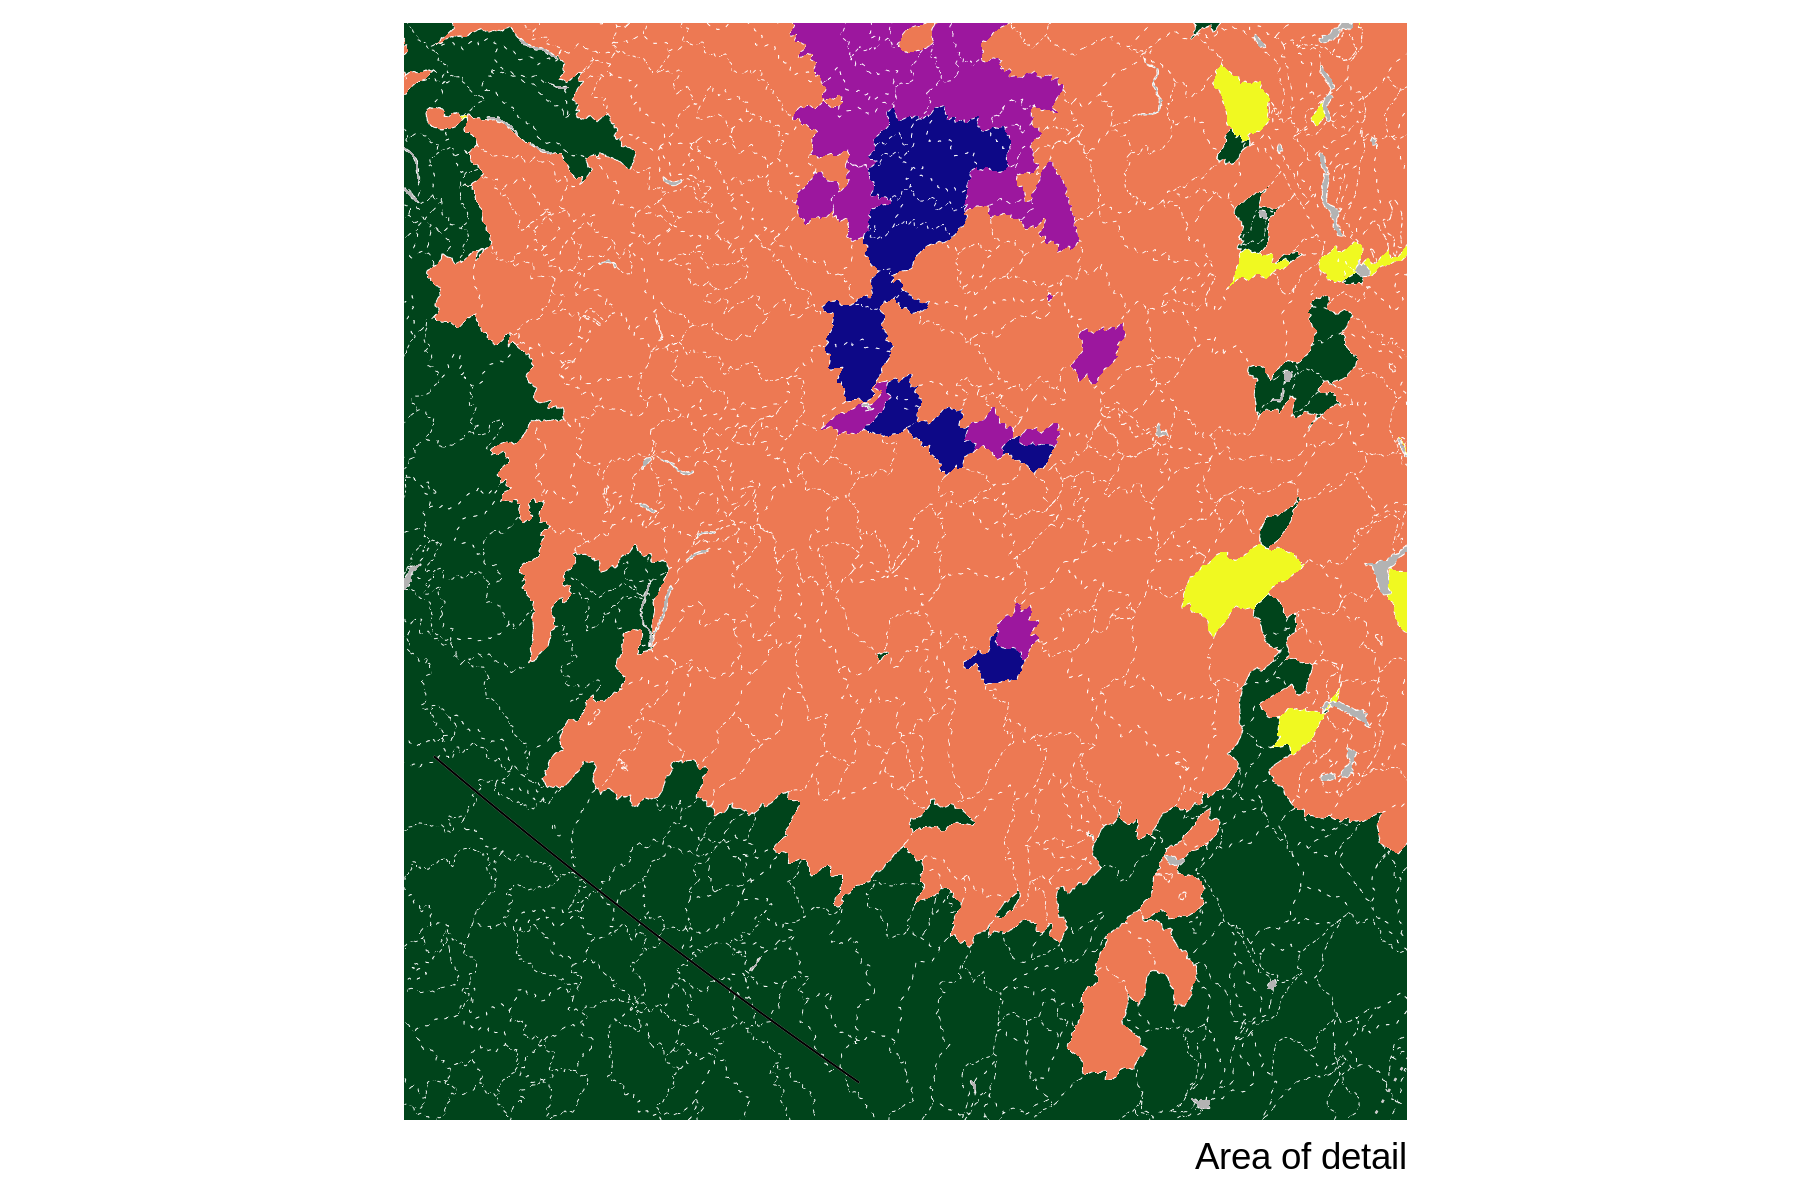

In [82]:
# Just testing a subset - still not good enough - needs:
# 1. graticule
# 2. basin boundaries shown
XLIM = c(-130,-125)
YLIM = c(60,65)
m_inset = DO_MAP_BOREAL_SP(MAP_EXTENT=ext, rotate_map=270, xlim=c(-170,-10), ylim=c(ext[3]-1, 90), 
                     BOREAL_SHP_FN = wwf_circ_dis_fn
                    ,LAYER_LIST = list(
                                        geom_polygon(data = hydrobasin_patterns, aes(x = long, y = lat, group = group, fill=pattern_class_adj), 
                                                    color='white', linetype='dotted', size=0.1, show_guide=FALSE))
                    ) + 
    theme(legend.text=element_text(size=rel(0.5))) +
    scale_fill_landscape_pattern_class +
    theme(plot.background = element_rect(fill = NA, colour = NA, size = 0.5)) +
    coord_map_stereo_list(proj_name = 'azequalarea', min_lat = 60, rotation=270, xlim = XLIM, ylim = YLIM) +
    labs(caption='Area of detail')
    #coord_sf(xlim = XLIM, ylim = YLIM, expand = TRUE, label_graticule = 'NW')

# m_inset = m_groups + 
# geom_polygon(data = hydrobasin_patterns, aes(x = long, y = lat, group = group), fill=NA, color='white', linetype='dotted', size=0.1, show_guide=FALSE) +
# #scale_color_manual(values=c('white')) +
# coord_sf(xlim = c(-125, -120), ylim = c(60, 65), expand = TRUE, crs = 4326, label_graticule = 'NW') + 
# coord_map_stereo_list(proj_name = 'azequalarea', min_lat = 60, rotation=270, xlim = c(-125,-120), ylim = c(60,65))

m_inset

No summary function supplied, defaulting to `mean_se()`


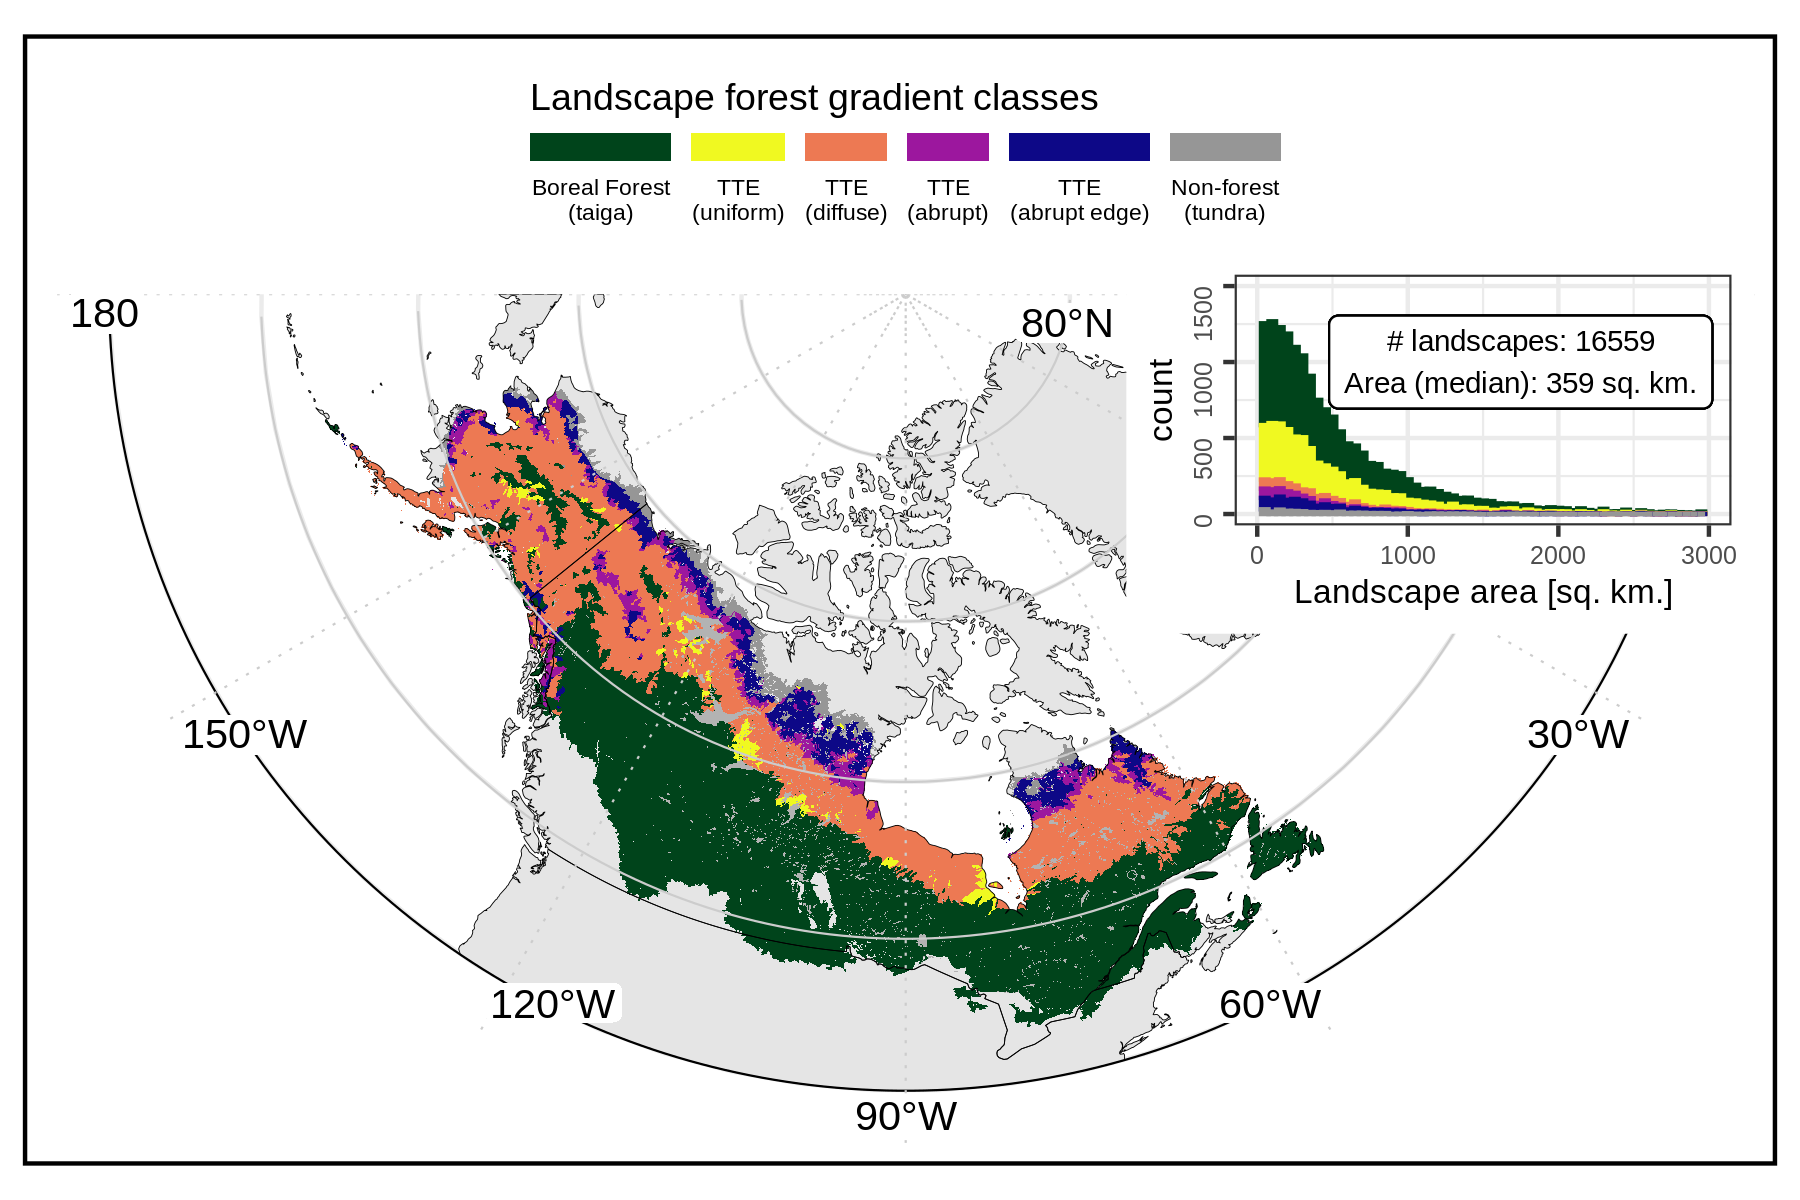

In [88]:
options(repr.plot.width = 6, repr.plot.height = 4, repr.plot.res = 300)

patch_m_groups_hist = m_groups + 
    inset_element(p_hist_mesoscale , 0.63, 0.6, 1, 1.05) #+
    #inset_element(m_inset , -0.18, 0.0, 0.45, 0.45, align_to='full') #+ 
    #plot_annotation(tag_levels = 'a')
    #plot_annotation(tag_levels = list(c('A','1')))

patch_m_groups_hist

In [118]:
plot_name = paste0('map_landscape_classes_', format(Sys.time(), "%Y%m%d"), out_ext)
ggsave(plot = patch_m_groups_hist, file = path(root_prj, 'plots', plot_name), device = out_ext_type, dpi = 300, width = 6, height = 4)

No summary function supplied, defaulting to `mean_se()`


In [51]:
head(study_domain)

long      lat      order hole  piece id group level_0 level_1 height_class
1 -143.8926 69.22440 1     FALSE 1     1  1.1   1       0       h_can to 0  
2 -144.0447 69.21342 2     FALSE 1     1  1.1   1       0       h_can to 0  
3 -143.8926 69.22440 3     FALSE 1     1  1.1   1       0       h_can to 0  
4 -143.8926 69.22440 4     FALSE 1     1  1.1   1       0       h_can to 0  
5 -143.7562 69.23161 1     FALSE 1     2  2.1   1       1       h_can to 0  
6 -143.7562 69.23161 2     FALSE 1     2  2.1   1       1       h_can to 0  
  domain           index_orig
1 training/testing 1         
2 training/testing 1         
3 training/testing 1         
4 training/testing 1         
5 training/testing 1         
6 training/testing 1

In [52]:
study_domain$height_class_adj = factor(study_domain$height_class)
study_domain$domain_adj = factor(study_domain$domain)
levels(study_domain$height_class_adj) = c('Main prediction domain', 'Extended training domain')
tail(study_domain)

long      lat      order hole  piece id group level_0 level_1
45598 -166.2105 64.76376 108   FALSE 1     65 65.1  5       30     
45599 -166.1507 61.67926   1   FALSE 1     66 66.1  5       31     
45600 -166.1636 61.67434   2   FALSE 1     66 66.1  5       31     
45601 -166.1477 61.71378   3   FALSE 1     66 66.1  5       31     
45602 -166.1496 61.68503   4   FALSE 1     66 66.1  5       31     
45603 -166.1507 61.67926   5   FALSE 1     66 66.1  5       31     
      height_class domain           index_orig height_class_adj        
45598 h_can to 0   training/testing 5          Extended training domain
45599 h_can to 0   training/testing 5          Extended training domain
45600 h_can to 0   training/testing 5          Extended training domain
45601 h_can to 0   training/testing 5          Extended training domain
45602 h_can to 0   training/testing 5          Extended training domain
45603 h_can to 0   training/testing 5          Extended training domain
      domain_adj      
45598 training/testing
45599 training/testing
45600 training/testing
45601 training/testing
45602 training/testing
45603 training/testing

In [65]:
boreal <- shp_fort_join(wwf_circ_dis_fn, ext, REPROJECT = TRUE)

[1] "Using sf and coercing to Spatial object..."
Reading layer `wwf_circumboreal_Dissolve' from data source `/panfs/ccds02/nobackup/people/pmontesa/userfs02/arc/wwf_circumboreal_Dissolve.shp' using driver `ESRI Shapefile'
Simple feature collection with 2 features and 4 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -5281040 ymin: -60527.9 xmax: 3959203 ymax: 8747447
Projected CRS: NAD83 / Alaska Albers


Regions defined for each Polygons


Regions defined for each Polygons


[1] "Not adding boreal layer to map..."


Regions defined for each Polygons


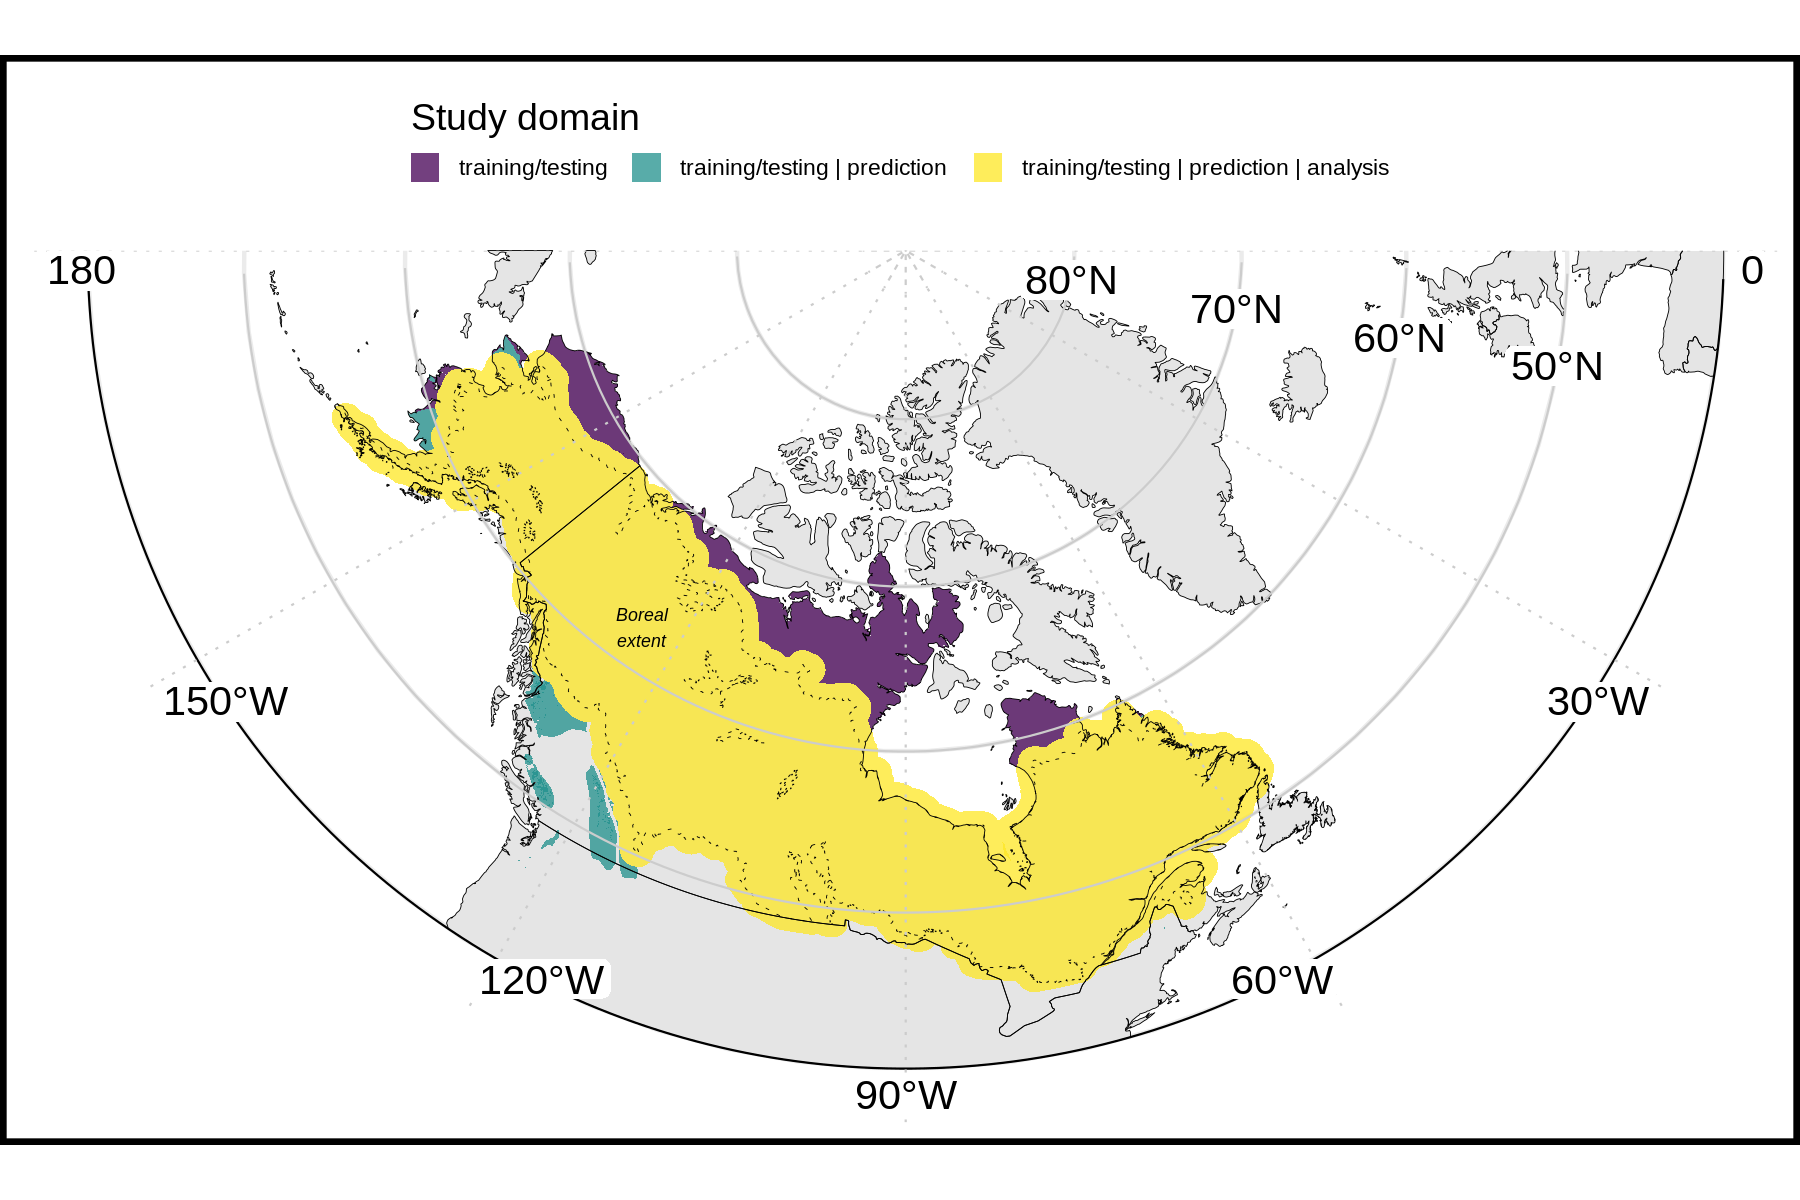

In [88]:
options(repr.plot.width = 6, repr.plot.height = 4, repr.plot.res = 300)

m_groups = DO_MAP_BOREAL_SP(MAP_EXTENT=ext, rotate_map=270, xlim=c(-170,-10), ylim=c(ext[3]-1, 90), 
                     BOREAL_SHP_FN = ''
                    ,LAYER_LIST = list(
                                        geom_polygon(data = study_domain , aes(x = long, y = lat, group = group, fill=domain), size=0.1)
                                        ,geom_polygon(data = boreal, aes(x = long, y = lat, group = group), fill=NA , color='black', linetype='dotted', size=0.1)
                                       
                                      )
                            
                    ) + 
    theme(legend.text=element_text(size=rel(0.5))) +
    geom_text(aes(x=-125, y=62.5, label='Boreal\nextent'), fill=NA, size=1.5, fontface='italic') +
    scale_fill_viridis_d(guide=FALSE, alpha=0.75) +
    #scale_fill_manual( values = alpha(c('#b2df8a', '#66c2a5'), 1)) + 
     theme(plot.background = element_rect(fill = NA, colour = 'black', size = 1.5)) +
    guides(fill=guide_legend(title="Study domain", title.position = "top", label.position = "right", legend.position = "bottom", keywidth = unit(.25, "cm"), keyheight = unit(.25, "cm"), nrow=1))


m_groups 

In [89]:
plot_name = paste0('map_study_domain_', format(Sys.time(), "%Y%m%d"), out_ext)
ggsave(plot = m_groups, file = path(root_prj, 'plots', plot_name), device = out_ext_type, dpi = 300, width = 6, height = 4)

## Map *some* of the ATL08 used to grid and train model
All ATL08:  
`atl08_boreal_na_20m_intersect_filt_20*_20*.gpkg`

In [23]:
atl08_path = "/explore/nobackup/people/pmontesa/userfs02/projects/ilab/boreal_height_cmip/atl08_boreal_na_20m_intersect_filt_2020_2020.gpkg"

In [24]:
#atl08_df = sample_fast_read(atl08_path) #'/projects/my-public-bucket/databank/boreal_height_cmip6/atl08_filt_20m.parquet'

In [25]:
atl08_df = sample_frac(st_read(atl08_path), 0.25) %>% 
            mutate(ht_can_20m_train = case_when(height_class == 'h_can' ~ h_can_20m,
                                         height_class == 'h_can to 0' ~ 0,
                                         TRUE ~ NA_real_))

Reading layer `atl08_boreal_na_20m_intersect_filt_2020_2020' from data source `/panfs/ccds02/nobackup/people/pmontesa/userfs02/projects/ilab/boreal_height_cmip/atl08_boreal_na_20m_intersect_filt_2020_2020.gpkg' using driver `GPKG'
Simple feature collection with 7361111 features and 25 fields
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: -167.9883 ymin: 44.21282 xmax: -55.37529 ymax: 71.78214
Geodetic CRS:  WGS 84


In [26]:
# atl08_df = atl08_df %>% 
#         mutate(ht_can_20m_train = case_when(height_class == 'h_can' ~ h_can_20m,
#                                          height_class == 'h_can to 0' ~ 0,
#                                          TRUE ~ NA_real_))

In [27]:
head(atl08_df)

Registered S3 method overwritten by 'geojsonsf':
  method        from   
  print.geojson geojson


id_unique                       lon        lat      h_can_20m lon_100m  
1 148W765747-66N0675270-202071-3  -148.76575 66.06753 24.602676 -148.76575
2 100W776855-59N5325690-2020918-5 -100.77693 59.53221  3.847412 -100.77686
3 89W2221670-52N6696350-2020926-1  -89.22211 52.66928  7.603210  -89.22217
4 107W091255-57N3839790-2020923-4 -107.09129 57.38416  2.104584 -107.09126
5 93W2258220-50N8764340-202073-2   -93.22580 50.87661 18.708588  -93.22582
6 124W351882-66N5048290-2020627-4 -124.35194 66.50465  7.741089 -124.35188
  lat_100m h_can     h_max_can h_te_best rh25      geom                      
1 66.06753 24.706146 25.802132 104.4433  1.7912369 POINT (-148.7657 66.06753)
2 59.53257  5.324799  5.324799 312.1008  1.2191467 POINT (-100.7769 59.53221)
3 52.66964  8.764801  9.052277 242.4561  1.8780518 POINT (-89.22211 52.66928)
4 57.38398  2.451691  2.648773 468.6409  0.7665710 POINT (-107.0913 57.38416)
5 50.87643 18.708588 19.645660 322.3141  2.5589600 POINT (-93.2258 50.87661) 
6 66.50483  5.396423  7.741089 290.6386  0.8527832 POINT (-124.3519 66.50465)
  ... seg_cover sol_el      dt                            
1 ... 100         2.4840584 b'2020-07-01T07:56:10.000000Z'
2 ...  64         0.1469459 b'2020-09-18T00:52:22.000000Z'
3 ...  92        -5.7111835 b'2020-09-26T11:19:47.000000Z'
4 ...  63        -3.5078588 b'2020-09-23T12:36:44.000000Z'
5 ...  99       -10.0965433 b'2020-07-03T04:04:46.000000Z'
6 ...  79         2.5329573 b'2020-06-27T06:30:13.000000Z'
  granule_name                            y    m doy height_class
1 ATL08_20200701075045_00910805_005_01.h5 2020 7 183 h_can       
2 ATL08_20200918004657_12930805_005_01.h5 2020 9 262 h_can       
3 ATL08_20200926111116_00350902_005_01.h5 2020 9 270 h_can       
4 ATL08_20200923122814_13770802_005_01.h5 2020 9 267 h_can       
5 ATL08_20200703035616_01190806_005_01.h5 2020 7 185 h_can       
6 ATL08_20200627062448_00290805_005_01.h5 2020 6 179 h_can       
  geom                       ht_can_20m_train
1 POINT (-148.7657 66.06753) 24.602676       
2 POINT (-100.7769 59.53221)  3.847412       
3 POINT (-89.22211 52.66928)  7.603210       
4 POINT (-107.0913 57.38416)  2.104584       
5 POINT (-93.2258 50.87661)  18.708588       
6 POINT (-124.3519 66.50465)  7.741089

Regions defined for each Polygons


[1] "Not adding boreal layer to map..."


Regions defined for each Polygons


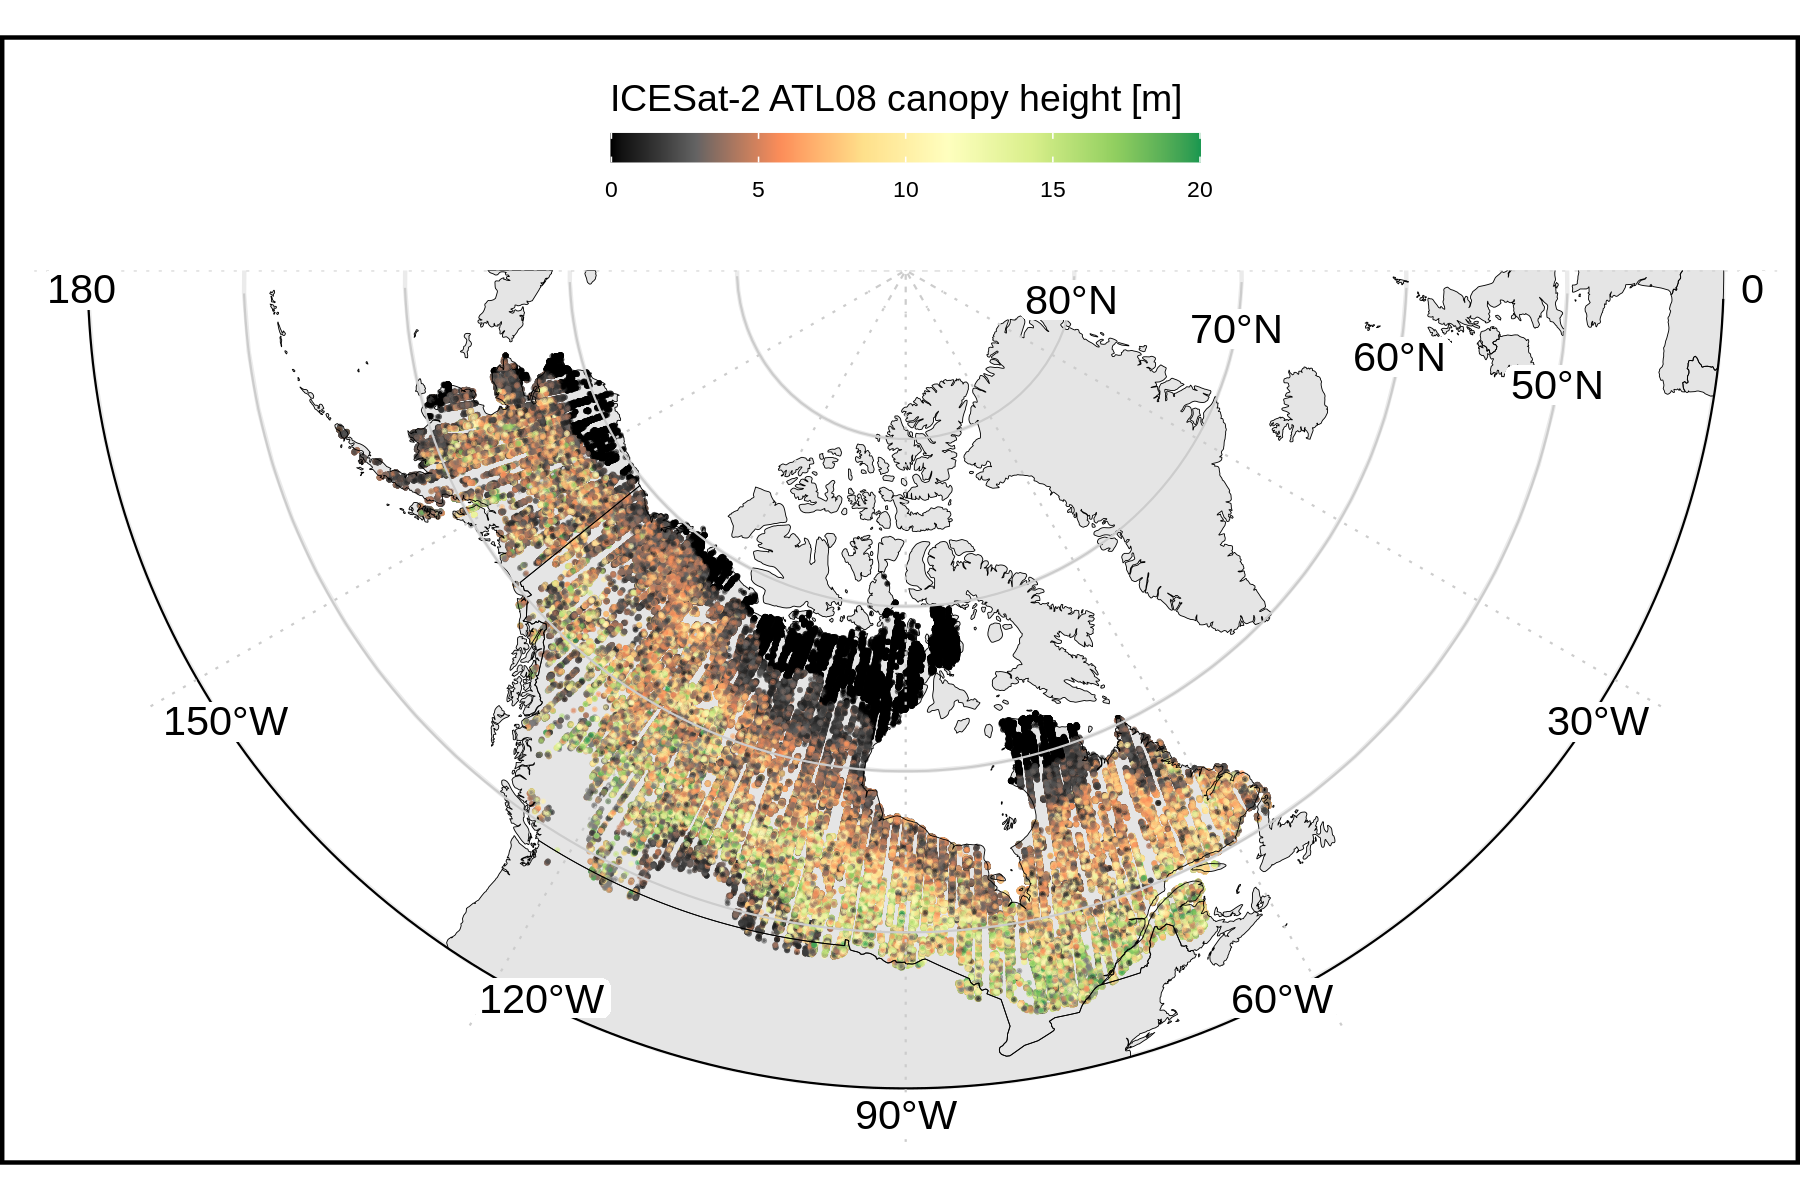

In [28]:
options(repr.plot.width = 6, repr.plot.height = 4, repr.plot.res = 300)

pal_ht = c('black','#636363','#fc8d59','#fee08b','#ffffbf','#d9ef8b','#91cf60','#1a9850')

theme_and_labs = list(
    theme_classic(),
    theme(plot.subtitle=element_text(size=8, hjust=0.5, face="italic", color="black"))
    #,
    #labs(
        #title="Vegetation canopy heights",
        #subtitle = paste0("Filtered sample of ICESat-2 ATL08 30m observations of RH98 in the boreal forest"," for ",year_atl08),
         #caption = paste0("# obs: ", NUM_ATL08_OBS, "\n# obs (night): ", NUM_ATL08_NIGHT_OBS)
         #caption = paste0("# of filtered ICESat-2 ATL08 30m segment obs. from ", year_atl08,": ", NUM_ATL08_OBS)
    #)    
)
scale_color_h_can = scale_colour_gradientn( breaks=c(0,5,10,15, 20), limits = c(0, 20), colours = pal_ht)


var_ht = 'ht_can_20m_train'

map_height_layer_list = list(
    geom_point(data = atl08_df, aes_string(x = "lon", y = "lat", colour=var_ht), alpha=0.5, size = 0.00001),
    scale_color_h_can,
    theme_and_labs,
    guides(color=guide_colourbar(title="ICESat-2 ATL08 canopy height [m]", title.position = "top", label.position = "bottom", keywidth = unit(.5, "cm"), keyheight = unit(.25, "cm")))
  )

m_atl08 = DO_MAP_BOREAL_SP(MAP_EXTENT=ext, rotate_map=270, xlim=c(-170,-10), ylim=c(ext[3]-1, 90), 
                     BOREAL_SHP_FN = '',
                     LAYER_LIST = map_height_layer_list                           
                    ) + 
    theme(legend.text=element_text(size=rel(0.5))) +
    #scale_fill_viridis_d(guide=FALSE, alpha=0.25) +
    #scale_fill_manual( values = alpha(c('#b2df8a', '#66c2a5'), 1)) + 
     theme(plot.background = element_rect(fill = NA, colour = 'black', size = 1)) +
    guides(fill=guide_legend(title="ICESat-2 ATL08", title.position = "top", label.position = "right", legend.position = "bottom", keywidth = unit(.25, "cm"), keyheight = unit(.25, "cm"), nrow=1))




m_atl08 

In [29]:
plot_name = paste0('map_atl08_', format(Sys.time(), "%Y%m%d"), out_ext)
ggsave(plot = m_atl08, file = path(root_prj, 'plots', plot_name), device = out_ext_type, dpi = 300, width = 6, height = 4)

# Map Prediction Diffs from current

In [7]:
TIFF_DIR = '/projects/my-public-bucket/databank/boreal_height_cmip6/output/median_predicted/'
TIFF_DIR = '/home/pmontesa/mfrost2/projects/boreal_hcan/output/clipped'

fn_list = list.files(TIFF_DIR, pattern='*DIFF_clipped.tif')

df_list = list()

for(r_fn in fn_list){
    
    r = raster(path(TIFF_DIR, r_fn), band=1)
    names(r) = tools::file_path_sans_ext(r_fn)
    
    # Convert to df 
    r_p <- sample_frac(data.frame(rasterToPoints(r)), 0.05) #0.01 sample is good for draft work
    
    names(r_p) = c('lon','lat','value')
    r_p$variable = names(r)
    r_p = separate(data = r_p, col = variable, into = c("stat", "ssp", "time_period"), sep = "_")
    r_p$ssp = factor(r_p$ssp)
    #r_p$time_period_fix = str_replace_all(r_p$time_period, '-', '-')
    r_p$time_period = factor(r_p$time_period)
    
    df_list[[names(r)]] = r_p
    rm(r_p)
}
r_p = do.call('rbind', df_list)
rownames(r_p) = NULL
dim(r_p)

Warning message in sp::CRS(from$proj4string):
“invalid PROJ4 string”Warning message in sp::CRS(from$proj4string):
“invalid PROJ4 string”Warning message in sp::CRS(from$proj4string):
“invalid PROJ4 string”Warning message in sp::CRS(from$proj4string):
“invalid PROJ4 string”Warning message in sp::CRS(from$proj4string):
“invalid PROJ4 string”Warning message in sp::CRS(from$proj4string):
“invalid PROJ4 string”Warning message in sp::CRS(from$proj4string):
“invalid PROJ4 string”Warning message in sp::CRS(from$proj4string):
“invalid PROJ4 string”Warning message in sp::CRS(from$proj4string):
“invalid PROJ4 string”Warning message in sp::CRS(from$proj4string):
“invalid PROJ4 string”Warning message in sp::CRS(from$proj4string):
“invalid PROJ4 string”Warning message in sp::CRS(from$proj4string):
“invalid PROJ4 string”Warning message in sp::CRS(from$proj4string):
“invalid PROJ4 string”Warning message in sp::CRS(from$proj4string):
“invalid PROJ4 string”Warning message in sp::CRS(from$proj4string):
“i

[1] 557968      6

In [21]:
levels(r_p$time_period) = c('2021-2040','2041-2060','2061-2080','2081-2100')
levels(r_p$time_period)

[1] "2021-2040" "2041-2060" "2061-2080" "2081-2100"

In [9]:
pal_DIFF = c('#8c510a','#d8b365','#f6e8c3','#f5f5f5','#c7eae5','#5ab4ac','#01665e')

theme_and_labs = list(
    theme_classic(),
    theme(plot.subtitle=element_text(size=8, hjust=0.5, face="italic", color="black"))
    #,
    #labs(
        #title="Vegetation canopy heights",
        #subtitle = paste0("Filtered sample of ICESat-2 ATL08 30m observations of RH98 in the boreal forest"," for ",year_atl08),
         #caption = paste0("# obs: ", NUM_ATL08_OBS, "\n# obs (night): ", NUM_ATL08_NIGHT_OBS)
         #caption = paste0("# of filtered ICESat-2 ATL08 30m segment obs. from ", year_atl08,": ", NUM_ATL08_OBS)
    #)    
)

In [16]:
options(repr.plot.width = 8, repr.plot.height = 6, repr.plot.res = 300)

scale_color_DIFF = scale_colour_gradientn( breaks=c(-5,-3,-1,0,1,3,5), limits = c(-5, 5), colours = pal_DIFF, oob = squish)



map_DIFF_layer_list = list(
        #geom_point(data = r_p %>% filter(variable == var), aes(x = lon, y = lat, colour=value), alpha=0.5, size = 0.00001),
        geom_point(data = r_p, aes(x = lon, y = lat, colour=value), alpha=0.5, size = 0.00001),
        facet_grid(ssp~time_period),
        scale_color_DIFF,
        theme_and_labs,
        guides(color=guide_colourbar(title="Potential difference in canopy height [m]\n(future - current)", title.position = "top", label.position = "bottom", keywidth = unit(.5, "cm"), keyheight = unit(.25, "cm"))),
        theme(legend.text=element_text(size=rel(0.5))),
        theme(plot.background = element_rect(fill = NA, colour = 'black', size = 1)),
        guides(fill=guide_legend(title="", title.position = "top", label.position = "right", legend.position = "bottom", keywidth = unit(.25, "cm"), keyheight = unit(.25, "cm"), nrow=1))

      )

m_DIFF = DO_MAP_BOREAL_SP(MAP_EXTENT=ext, rotate_map=270, xlim=c(-170,-40), ylim=c(ext[3]-1, 90), 
                         BOREAL_SHP_FN = wwf_circ_dis_fn,
                         LAYER_LIST = map_DIFF_layer_list,
                          DO_COORD_MAP=FALSE # Setting to false to allow for facetting
                        ) 


m_DIFF + coord_map("azequalarea", orientation = c(90, 0, 270), xlim=c(-170,-40), ylim=c(ext[3]-1, 90))
# m_DIFF_facet = m_DIFF + 
#     coord_map("orthographic", orientation = c(90, 0, 225), xlim=c(-152,-60), ylim=c(50, 50)) +
#     theme(
#             panel.grid.major = element_blank(),
#             strip.background = element_rect(colour="black", fill="white"),        
#           #panel.border = element_blank(),
#         panel.spacing = unit(.05, "lines"),
#         panel.border = element_rect(color = "black", fill = NA), 
#         axis.text = element_blank())
# m_DIFF_facet

Regions defined for each Polygons


ERROR: Error in eval(expr, envir, enclos): object 'm_DIFF' not found


In [20]:
DO_MAP_BOREAL_SP(MAP_EXTENT=ext, rotate_map=270, xlim=c(-170,-40), ylim=c(ext[3]-1, 90), 
                         BOREAL_SHP_FN = wwf_circ_dis_fn,
                         LAYER_LIST = map_DIFF_layer_list,
                          DO_COORD_MAP=TRUE # Setting to false to allow for facetting
                        ) + coord_map("azequalarea", orientation = c(90, 0, 270), xlim=c(-170,-40), ylim=c(ext[3]-1, 90))

Regions defined for each Polygons


In [64]:
plot_name = paste0('map_facet_diff_future_current_time_ssp_', format(Sys.time(), "%Y%m%d"), out_ext)
ggsave(plot = m_DIFF_facet, file = path(root_prj, 'plots', plot_name), device = out_ext_type, dpi = 300, width = 8, height = 6)

In [25]:
root_prj

[1] "/explore/nobackup/people/pmontesa/userfs02/projects/ilab/boreal_height_cmip/"

# Map of TCC trend (1984-2020), zonal (basins) median trend

In [23]:
TCC_TREND_TITLE = 'Change in tree canopy cover [%/yr]\n(median landscape trend, 1984-2020)'

In [24]:
options(warn=-1)

zonal_basins_fn = '/home/pmontesa/mfrost2/projects/boreal_hcan/data/hydrobasins_L08_patterns_tte_boreal_tundra_tcc_trends.gpkg'
zonal_basins_gdf = st_read(zonal_basins_fn)
zonal_basins_df = shp_fort_join(zonal_basins_fn, ext, REPROJECT=FALSE, CROP=FALSE) %>% 
        mutate(pattern_class = factor(pattern_class)) %>% select(long, lat, group, HYBAS_ID, pattern_class, val_terrapulse_tcc_slope_median,val_terrapulse_tcc_pvalue_median, area_sqkm) %>% drop_na()
head(zonal_basins_df)

Reading layer `hydrobasins_L08_patterns_tte_boreal_tundra_tcc_trends' from data source `/panfs/ccds02/nobackup/people/mfrost2/projects/boreal_hcan/data/hydrobasins_L08_patterns_tte_boreal_tundra_tcc_trends.gpkg' using driver `GPKG'
Simple feature collection with 15317 features and 23 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -166.1588 ymin: 46.60772 xmax: -52.61605 ymax: 70.25898
Geodetic CRS:  WGS 84
[1] "Using sf and coercing to Spatial object..."
Reading layer `hydrobasins_L08_patterns_tte_boreal_tundra_tcc_trends' from data source `/panfs/ccds02/nobackup/people/mfrost2/projects/boreal_hcan/data/hydrobasins_L08_patterns_tte_boreal_tundra_tcc_trends.gpkg' using driver `GPKG'
Simple feature collection with 15317 features and 23 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -166.1588 ymin: 46.60772 xmax: -52.61605 ymax: 70.25898
Geodetic CRS:  WGS 84


ERROR: Error in head(zonal_basins_df): object 'zonal_basins_df' not found


#### Get the # of basins for which TCC trends were extracted

In [ ]:
dim(zonal_basins_gdf %>% drop_na())

In [ ]:
levels(zonal_basins_df$pattern_class) 
#GRADIENT_CLASSES_RENAMED

In [ ]:
zonal_basins_df$pattern_class_adj = zonal_basins_df$pattern_class
str(zonal_basins_df)

In [ ]:
#zonal_basins_df$pattern_class_adj <- factor(zonal_basins_df$pattern_class)
zonal_basins_df$pattern_class_adj = factor(zonal_basins_df$pattern_class_adj, levels = rev(c('Boreal Forest (taiga)', 'TTE (uniform)', 'TTE (diffuse)', 'TTE (abrupt)', 'TTE (abrupt edge)', 'Non-forest (tundra)')))
levels(zonal_basins_df$pattern_class_adj) 
#str(zonal_basins_df)

In [ ]:
options(repr.plot.width = 6, repr.plot.height = 3, repr.plot.res = 100)


#levels(zonal_basins_gdf$pattern_class_adj) = GRADIENT_CLASSES_RENAMED
pattern_class_colors <- c('#00441b', rev(viridis::plasma(n = 4)), '#969696') # accounting for reverse order of TTE classes here
names(pattern_class_colors) <- rev(levels(zonal_basins_df$pattern_class_adj))

# # Re-order factor levels
# zonal_basins_df$pattern_class_adj <- factor(zonal_basins_df$pattern_class,
#                 levels = c(GRADIENT_CLASSES_RENAMED[6], GRADIENT_CLASSES_RENAMED[3], GRADIENT_CLASSES_RENAMED[2], GRADIENT_CLASSES_RENAMED[4:5], GRADIENT_CLASSES_RENAMED[1]) )
levels(zonal_basins_df$pattern_class_adj) 
pattern_class_colors
show_col(pattern_class_colors)

In [ ]:
head(zonal_basins_df)

In [ ]:
options(repr.plot.width = 6, repr.plot.height = 4, repr.plot.res = 300)

scale_fill_TCC_trend = scale_fill_gradientn( breaks=c(-0.5,-0.3,-0.1,0,0.1,0.3,0.5), limits = c(-0.5, 0.5), colours = pal_DIFF, oob = squish)

map_TREND_layer_list = list(
        geom_polygon(data = sample_frac(zonal_basins_df, 1), aes(x = long, y = lat, group = group, fill=val_terrapulse_tcc_slope_median), size=0.1),
        scale_fill_TCC_trend,
        theme_and_labs
        #,guides(color=guide_colourbar(title="Mulit-decadal TCC trend", title.position = "top", label.position = "bottom", keywidth = unit(.5, "cm"), keyheight = unit(.25, "cm"))),
      )

m_zonal_tcc_trend = DO_MAP_BOREAL_SP(MAP_EXTENT=ext, rotate_map=270, xlim=c(-170,-10), ylim=c(ext[3]-1, 90), 
                     BOREAL_SHP_FN = ''#wwf_circ_dis_fn
                    #,LAYER_LIST = list(geom_polygon(data = sample_frac(zonal_basins_df, 1), aes(x = long, y = lat, group = group, fill=val_terrapulse_tcc_slope_median), size=0.1)) #, fill=NA
                    ,LAYER_LIST = map_TREND_layer_list
                     ) + 
     theme(legend.text=element_text(size=rel(1))) +
#     #scale_color_brewer(palette = 'Set2') +
#     #scale_fill_viridis_d() +
#     #scale_fill_manual( values = COLOR_DICT) +
#     scale_fill_TCC_trend +
     guides(fill=guide_colourbar(title=TCC_TREND_TITLE, title.position = "top", label.position = "bottom", keywidth = unit(.5, "cm"), keyheight = unit(.25, "cm"))) +
     theme(legend.text=element_text(size=rel(0.5))) +
     theme(plot.background = element_rect(fill = NA, colour = 'black', size = 1))

m_zonal_tcc_trend

In [101]:
plot_name = paste0('map_zonal_tcc_trend_', format(Sys.time(), "%Y%m%d"), out_ext)
ggsave(plot = m_zonal_tcc_trend, file = path(root_prj, 'plots', plot_name), device = out_ext_type, dpi = 300, width = 6, height = 4)

In [102]:
smry_zonal_basins_df = zonal_basins_df %>% group_by(HYBAS_ID, pattern_class_adj, area_sqkm) %>% summarize(count = n()) %>% group_by(pattern_class_adj) %>% summarize(count = n())
smry_zonal_basins_df

`summarise()` has grouped output by 'HYBAS_ID', 'pattern_class_adj'. You can override using the `.groups` argument.

pattern_class_adj     count
1 Non-forest (tundra)      5 
2 TTE (abrupt edge)      272 
3 TTE (abrupt)           521 
4 TTE (diffuse)         4882 
5 TTE (uniform)          302 
6 Boreal Forest (taiga) 6752

In [103]:
smry_zonal_basins_df_area = zonal_basins_df %>% group_by(HYBAS_ID, pattern_class_adj, area_sqkm) %>% group_by(pattern_class_adj) %>% summarize(class_area = sum(area_sqkm))
smry_zonal_basins_df_area

pattern_class_adj     class_area  
1 Non-forest (tundra)   1.808202e+04
2 TTE (abrupt edge)     5.146435e+07
3 TTE (abrupt)          1.056079e+08
4 TTE (diffuse)         9.399380e+08
5 TTE (uniform)         4.685521e+07
6 Boreal Forest (taiga) 1.182232e+09

In [104]:
zonal_basins_df$pattern_class_adj = factor(zonal_basins_df$pattern_class_adj, levels = rev(c('Boreal Forest (taiga)', 'TTE (uniform)', 'TTE (diffuse)', 'TTE (abrupt)', 'TTE (abrupt edge)', 'Non-forest (tundra)')))
levels(zonal_basins_df$pattern_class_adj) 

[1] "Non-forest (tundra)"   "TTE (abrupt edge)"     "TTE (abrupt)"         
[4] "TTE (diffuse)"         "TTE (uniform)"         "Boreal Forest (taiga)"

In [159]:
options(repr.plot.width =6, repr.plot.height = 3, repr.plot.res = 100)

#pattern_class_colors <- c('#00441b', rev(viridis::plasma(n = 4)), '#969696')
#pattern_class_colors <- c('#00441b', viridis::plasma(n = 4), '#969696')
scale_color_landscape_pattern_class <- scale_colour_manual(values = pattern_class_colors, name = name_landscape_patterns)
scale_fill_landscape_pattern_class <- scale_fill_manual(values = pattern_class_colors, name = name_landscape_patterns)

hist_area_pattern_class_zonal_tcc_trend = 
    ggplot(smry_zonal_basins_df_area %>% filter(pattern_class_adj != 'Non-forest (tundra)') )+ 
    geom_bar(aes(x=pattern_class_adj, y=class_area, fill=pattern_class_adj), stat='identity', show_guide = FALSE) + 
    scale_fill_landscape_pattern_class +
    #coord_flip() + 
    theme_bw() +
    labs(y='Area (sq.km.) of\nlandscapes', x='') +
    theme(
    #panel.background = element_rect(fill = "transparent"),
      panel.grid.major = element_blank(), # get rid of major grid
      panel.grid.minor = element_blank(), # get rid of minor grid
        axis.title.y = element_text(size=5),
        axis.text.y = element_text(size=4),
        axis.text.x = element_text(angle=90, size=6))

hist_pattern_class_zonal_tcc_trend = 
    ggplot(smry_zonal_basins_df %>% filter(pattern_class_adj != 'Non-forest (tundra)') )+ 
    geom_bar(aes(x=pattern_class_adj, y=count, fill=pattern_class_adj), stat='identity', show_guide = FALSE) + 
    scale_fill_landscape_pattern_class +
    #coord_flip() + 
    theme_bw() +
    labs(y='# of\nlandscapes', x='') +
    theme(
    #panel.background = element_rect(fill = "transparent"),
      panel.grid.major = element_blank(), # get rid of major grid
      panel.grid.minor = element_blank(), # get rid of minor grid
        text = element_text(size=5),
        axis.title.y = element_text(size=5),
        axis.text.y = element_text(size=4),
        axis.text.x = element_text(angle=90,size=6))

boxplot_pattern_class_zonal_tcc_trend = 
    ggplot(zonal_basins_df %>% filter(pattern_class_adj != 'Non-forest (tundra)')) + 
    
    geom_violin(aes(x=factor(pattern_class_adj), y=val_terrapulse_tcc_slope_median, fill=factor(pattern_class_adj)), 
                outlier.shape = '' , show_guide = FALSE, lwd=0.1, scale = "width", trim = FALSE, draw_quantiles = c(0.5)) +
    geom_hline(yintercept=0, linetype='dashed',lwd=0.1) +
    theme_bw() + 
    
    scale_fill_landscape_pattern_class +
    coord_cartesian(ylim=c(-0.5,0.75)) + 
    #coord_flip(ylim=c(-0.5,0.75)) +
    labs(x='', y=TCC_TREND_TITLE) +
    theme(
       #rect = element_rect(fill = "transparent"),
          panel.grid.major = element_blank(), # get rid of major grid
          panel.grid.minor = element_blank(), # get rid of minor grid
        #text = element_text(size=5),
        axis.title.y = element_text(size=5),
        axis.text.y = element_text(size=5),
        #axis.text.x = element_text(size=6),
        axis.ticks.x=element_blank(), 
        axis.text.x=element_blank()
    )

p_hist_box = hist_area_pattern_class_zonal_tcc_trend + hist_pattern_class_zonal_tcc_trend + boxplot_pattern_class_zonal_tcc_trend


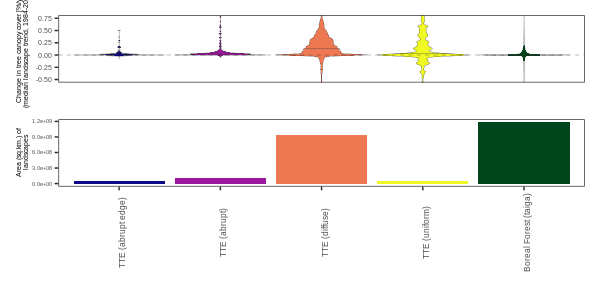

In [160]:
p_hist_box = boxplot_pattern_class_zonal_tcc_trend / hist_area_pattern_class_zonal_tcc_trend
p_hist_box

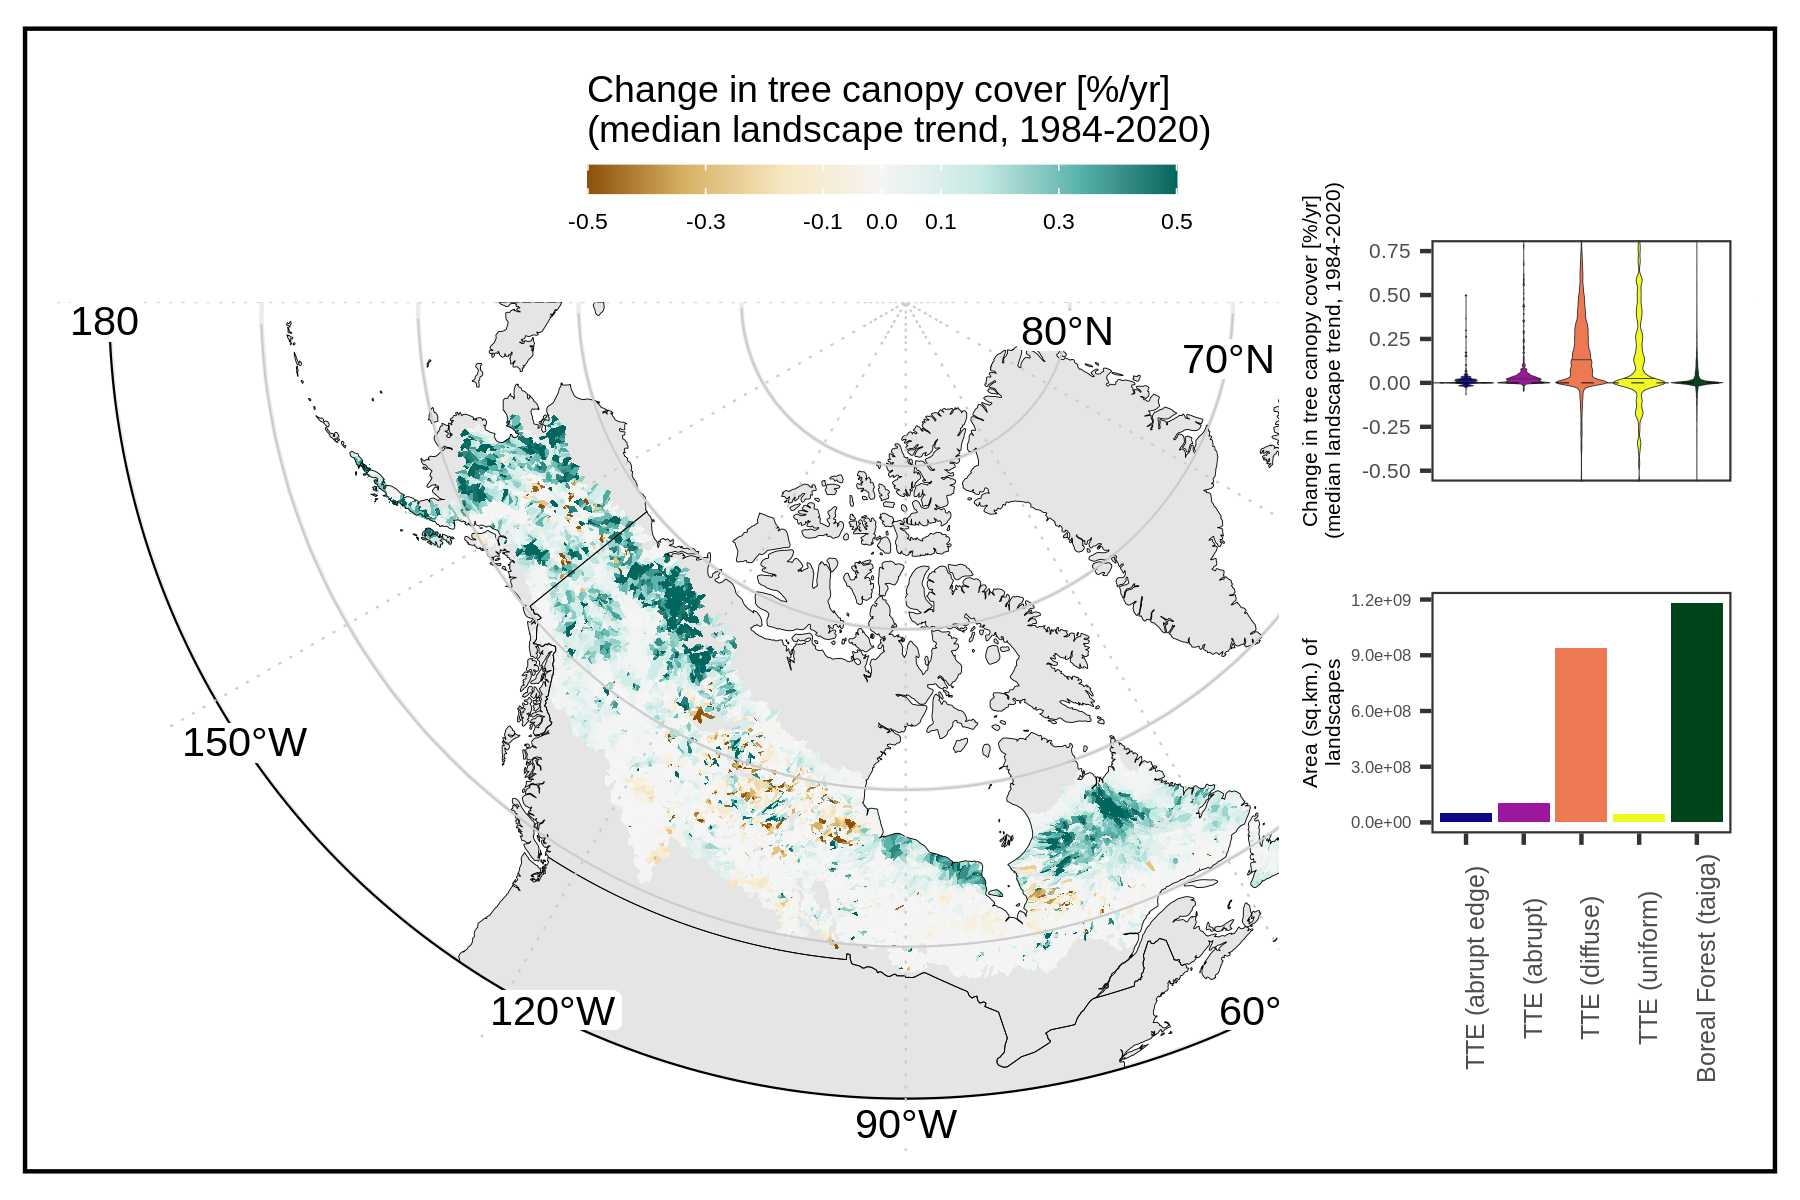

In [161]:
options(repr.plot.width = 6, repr.plot.height = 4, repr.plot.res = 300)

patch_m_zonal_tcc_trend = m_zonal_tcc_trend + 
    #inset_element(p_hist_box , 0.4, 0.7, 1, 1.05) + # left, bottom, right, top
    inset_element(p_hist_box , 0.72, 0.0, 1, 1.1) #+ plot_annotation(tag_levels = 'a')

patch_m_zonal_tcc_trend

In [162]:
plot_name = paste0('map_zonal_tcc_trend_subplots_', format(Sys.time(), "%Y%m%d"), out_ext)
ggsave(plot = patch_m_zonal_tcc_trend, file = path(root_prj, 'plots', plot_name), device = out_ext_type, dpi = 300, width = 6, height = 4)

# Plot TCC trend vs prediction DIFFs

In [5]:
zonal_basins_DIFFS_fn = '/panfs/ccds02/nobackup/people/mfrost2/projects/boreal_hcan/GIS/hydrobasins_L08_patterns_tte_boreal_tundra_median_diffs.gpkg'
zonal_basins_DIFFS_gdf = st_read(zonal_basins_DIFFS_fn) %>% st_transform(crs=3995)

Reading layer `hydrobasins_L08_patterns_tte_boreal_tundra_median_diffs' from data source `/panfs/ccds02/nobackup/people/mfrost2/projects/boreal_hcan/GIS/hydrobasins_L08_patterns_tte_boreal_tundra_median_diffs.gpkg' using driver `GPKG'
Simple feature collection with 17052 features and 18 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -167.8668 ymin: 43.2 xmax: -52.61605 ymax: 70.25898
Geodetic CRS:  WGS 84


In [124]:
# This is buggy - breaks the join..
#zonal_basins_DIFFS_gdf$area <- st_area(zonal_basins_DIFFS_gdf)
#zonal_basins_DIFFS_gdf$area_sqkm = zonal_basins_DIFFS_gdf$area * 1e-6

#### Get the # of basins for which zonal stats was run:
1. to get median DIFFs of predicted heights
2. to get median TCC trends

In [125]:
dim(zonal_basins_DIFFS_gdf %>% filter(!is.na(Med_diff_ssp245_2061.2080)))

[1] 16559    19

In [126]:
dim(zonal_basins_DIFFS_gdf %>% filter(is.na(Med_diff_ssp245_2061.2080)))

[1] 493  19

### Map the NULL landscapes to understand why they are NULL
either too small or at the edge of the data

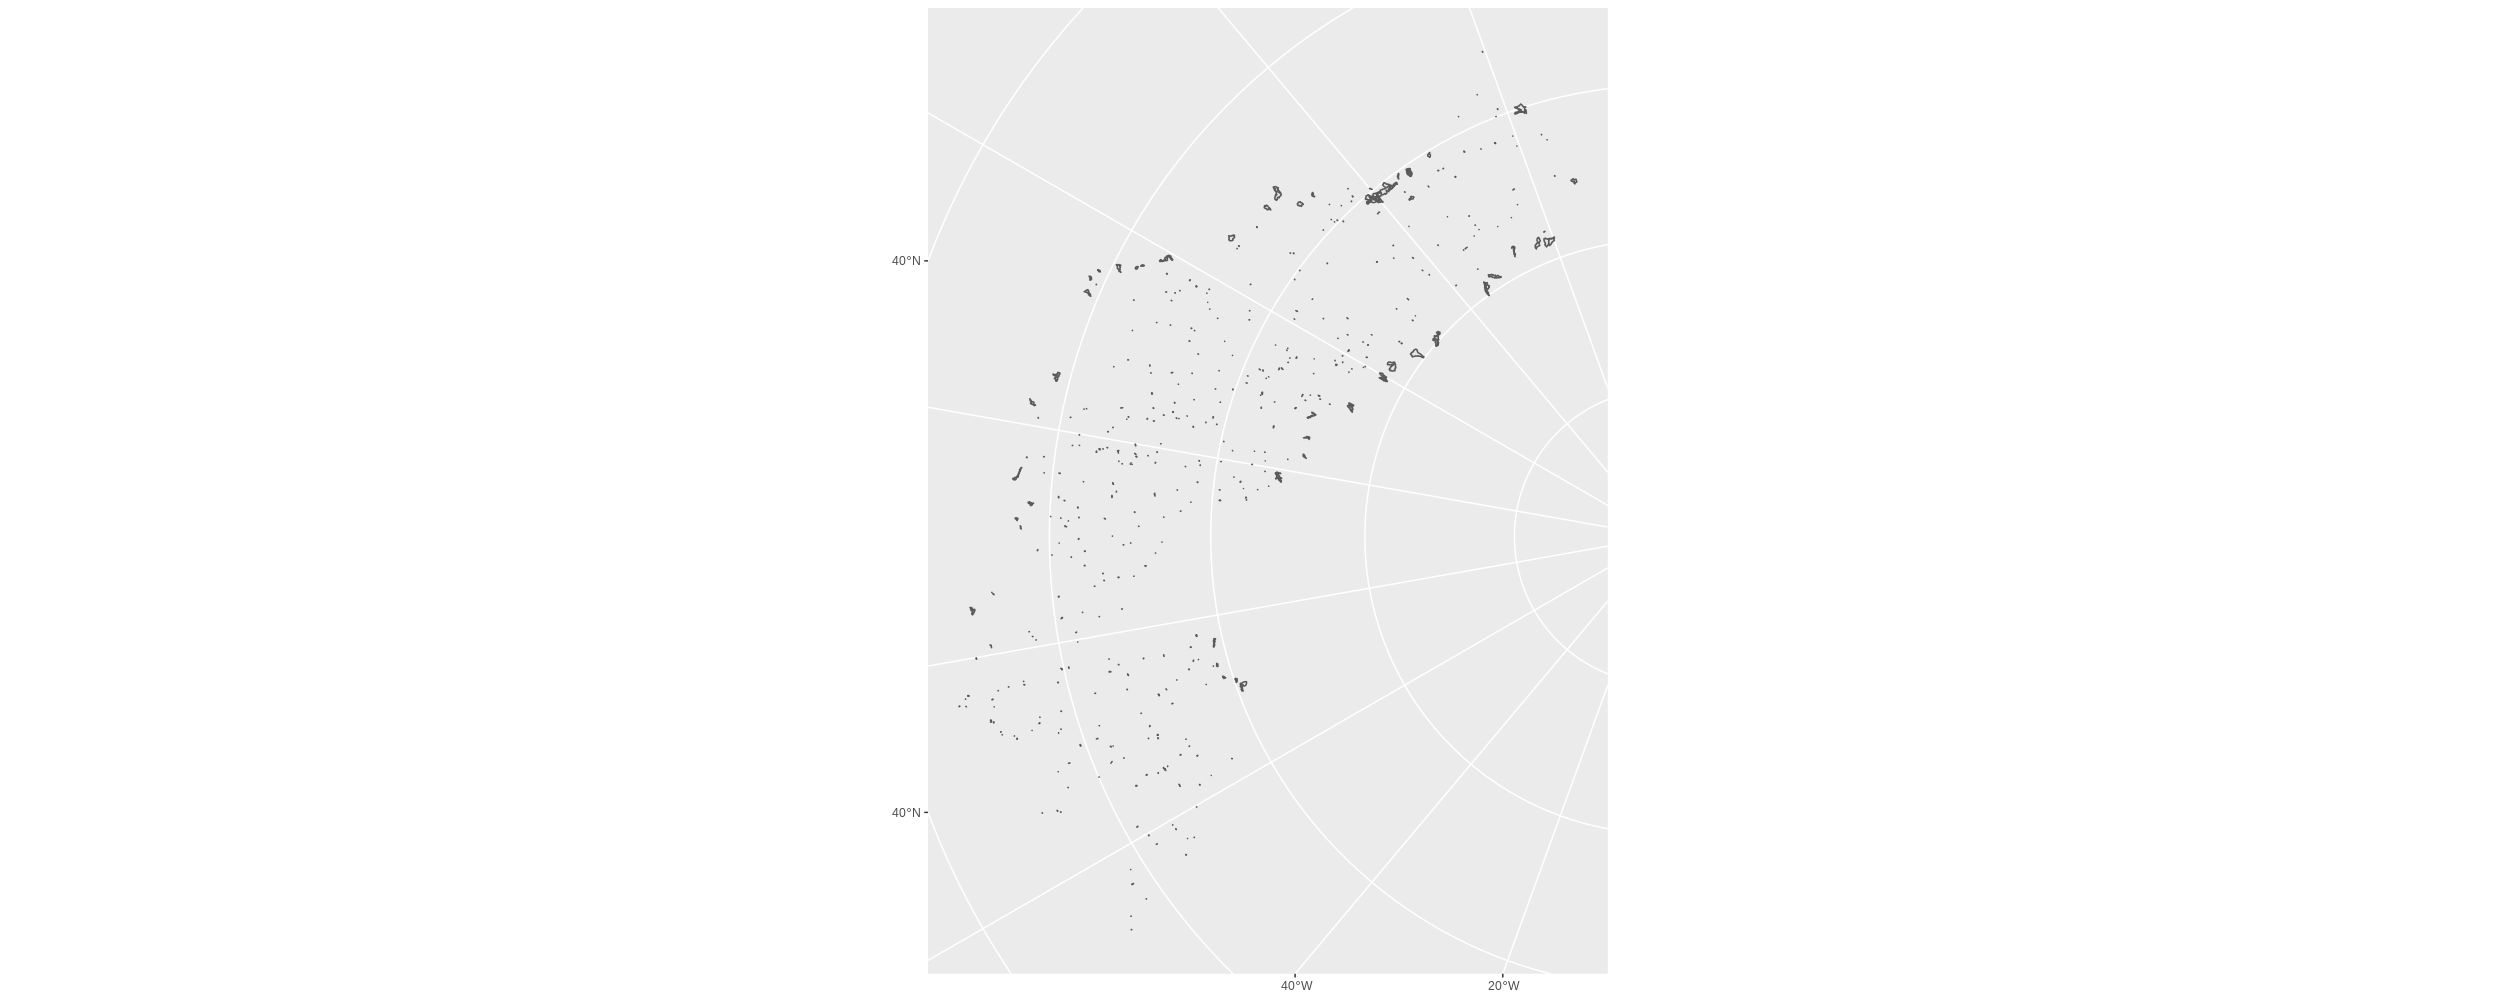

In [127]:
ggplot(zonal_basins_DIFFS_gdf %>% filter(is.na(Med_diff_ssp245_2061.2080))) + geom_sf()

## Final # of landscapes

### with potential height diffs (future - current)

In [17]:
dim(zonal_basins_DIFFS_gdf %>% drop_na())

[1] 16559    19

### with recent trends in TCC

In [120]:
dim(zonal_basins_gdf %>% drop_na())

[1] 12734    24

### Final joined df of recent TCC trends and future height predictions

In [121]:
str(zonal_basins_df)

'data.frame':	2807834 obs. of  8 variables:
 $ long                           : num  -133 -133 -133 -133 -133 ...
 $ lat                            : num  58.3 58.3 58.3 58.2 58.3 ...
 $ group                          : Factor w/ 24217 levels "1.1","2.1","3.1",..: 85 85 85 85 85 85 85 85 85 85 ...
 $ HYBAS_ID                       : num  7.08e+09 7.08e+09 7.08e+09 7.08e+09 7.08e+09 ...
 $ pattern_class                  : Factor w/ 6 levels "Boreal Forest (taiga)",..: 4 4 4 4 4 4 4 4 4 4 ...
 $ val_terrapulse_tcc_slope_median: num  0 0 0 0 0 0 0 0 0 0 ...
 $ area_sqkm                      : num  1870 1870 1870 1870 1870 ...
 $ pattern_class_adj              : Factor w/ 6 levels "Non-forest (tundra)",..: 3 3 3 3 3 3 3 3 3 3 ...


In [128]:
joined = zonal_basins_gdf %>% 
            drop_na() %>%
            dplyr::select(HYBAS_ID, val_terrapulse_tcc_slope_median, val_terrapulse_tcc_pvalue_median, area_sqkm) %>%
            left_join(zonal_basins_DIFFS_gdf %>% drop_na() %>% as.data.frame() %>% select(!geom) , by = 'HYBAS_ID') %>%
            drop_na()

joined$pattern_class = factor(joined$pattern_class, levels = rev(c('Boreal Forest (taiga)', 'TTE (uniform)', 'TTE (diffuse)', 'TTE (abrupt)', 'TTE (abrupt edge)', 'Non-forest (tundra)')))

head(joined)

HYBAS_ID   val_terrapulse_tcc_slope_median area_sqkm pattern_class    
1 7080020432 0.00000000                      1870.0770 TTE (abrupt)     
2 7080020501 0.02137841                      1009.1296 TTE (diffuse)    
3 7080021130 0.00000000                       681.1919 TTE (abrupt edge)
4 7080021430 0.00000000                      2951.3035 TTE (abrupt)     
5 7080021551 0.00000000                       471.5030 TTE (abrupt)     
6 7080021552 0.00284495                       478.4794 TTE (abrupt)     
  Med_diff_ssp245_2061.2080 Med_diff_ssp585_2041.2060 Med_diff_ssp585_2061.2080
1  0.9112656                 0.4803784                1.108387                 
2  1.4269199                 1.4269199                1.652592                 
3 14.0833492                16.0327415                8.755383                 
4 -0.2714396                 0.0504899                1.164692                 
5  0.5646479                 1.2031863                1.353511                 
6  0.5646479                 0.5646479                1.481303                 
  Med_diff_ssp126_2061.2080 Med_diff_ssp245_2041.2060 Med_diff_ssp370_2041.2060
1  0.4803784                0.4803784                 0.4803784                
2  0.9191968                0.8898575                 0.8387473                
3 11.0240841                8.2547436                 6.8916111                
4  0.3926969                0.2386208                 0.1367254                
5  0.9728129                0.9728129                 0.7771015                
6  0.9728129                0.9728129                 0.5646479                
  geom                           ... Med_diff_ssp370_2021.2040
1 MULTIPOLYGON (((-133.4458 5... ... 0.4488239                
2 MULTIPOLYGON (((-133.6708 5... ... 0.4803784                
3 MULTIPOLYGON (((-137.3917 5... ... 2.2554193                
4 MULTIPOLYGON (((-94.8125 59... ... 0.3373635                
5 MULTIPOLYGON (((-94.85676 5... ... 0.9728129                
6 MULTIPOLYGON (((-94.88519 5... ... 0.9728129                
  Med_diff_ssp585_2021.2040 Med_diff_ssp370_2061.2080 Med_diff_ssp585_2081.2100
1 0.4803784                  0.9292023                 1.1523337               
2 0.4803784                  1.7253757                 1.6525924               
3 7.3175554                 14.2424965                 7.7124672               
4 0.3373635                  0.7012248                -0.2721181               
5 0.9728129                  1.9212520                 0.4223357               
6 0.9728129                  2.9482877                -0.3548658               
  Med_diff_ssp126_2021.2040 Med_diff_ssp245_2021.2040 Med_diff_ssp245_2081.2100
1 0.4624417                 0.4803784                  1.1699824               
2 0.8387473                 0.4803784                  1.6707883               
3 0.4519292                 0.4519292                 11.7513275               
4 0.4150665                 0.2545724                  0.2545724               
5 0.9728129                 0.9728129                  1.4867961               
6 0.9728129                 0.9728129                  1.9605505               
  Med_diff_ssp126_2081.2100 Med_diff_ssp126_2041.2060
1 0.6361134                 0.4803784                
2 0.8518863                 0.6595628                
3 8.8837223                 7.2125525                
4 0.1367254                 0.4586549                
5 0.7687304                 0.9728129                
6 0.7687304                 0.9728129                
  geom                          
1 MULTIPOLYGON (((-133.4458 5...
2 MULTIPOLYGON (((-133.6708 5...
3 MULTIPOLYGON (((-137.3917 5...
4 MULTIPOLYGON (((-94.8125 59...
5 MULTIPOLYGON (((-94.85676 5...
6 MULTIPOLYGON (((-94.88519 5...

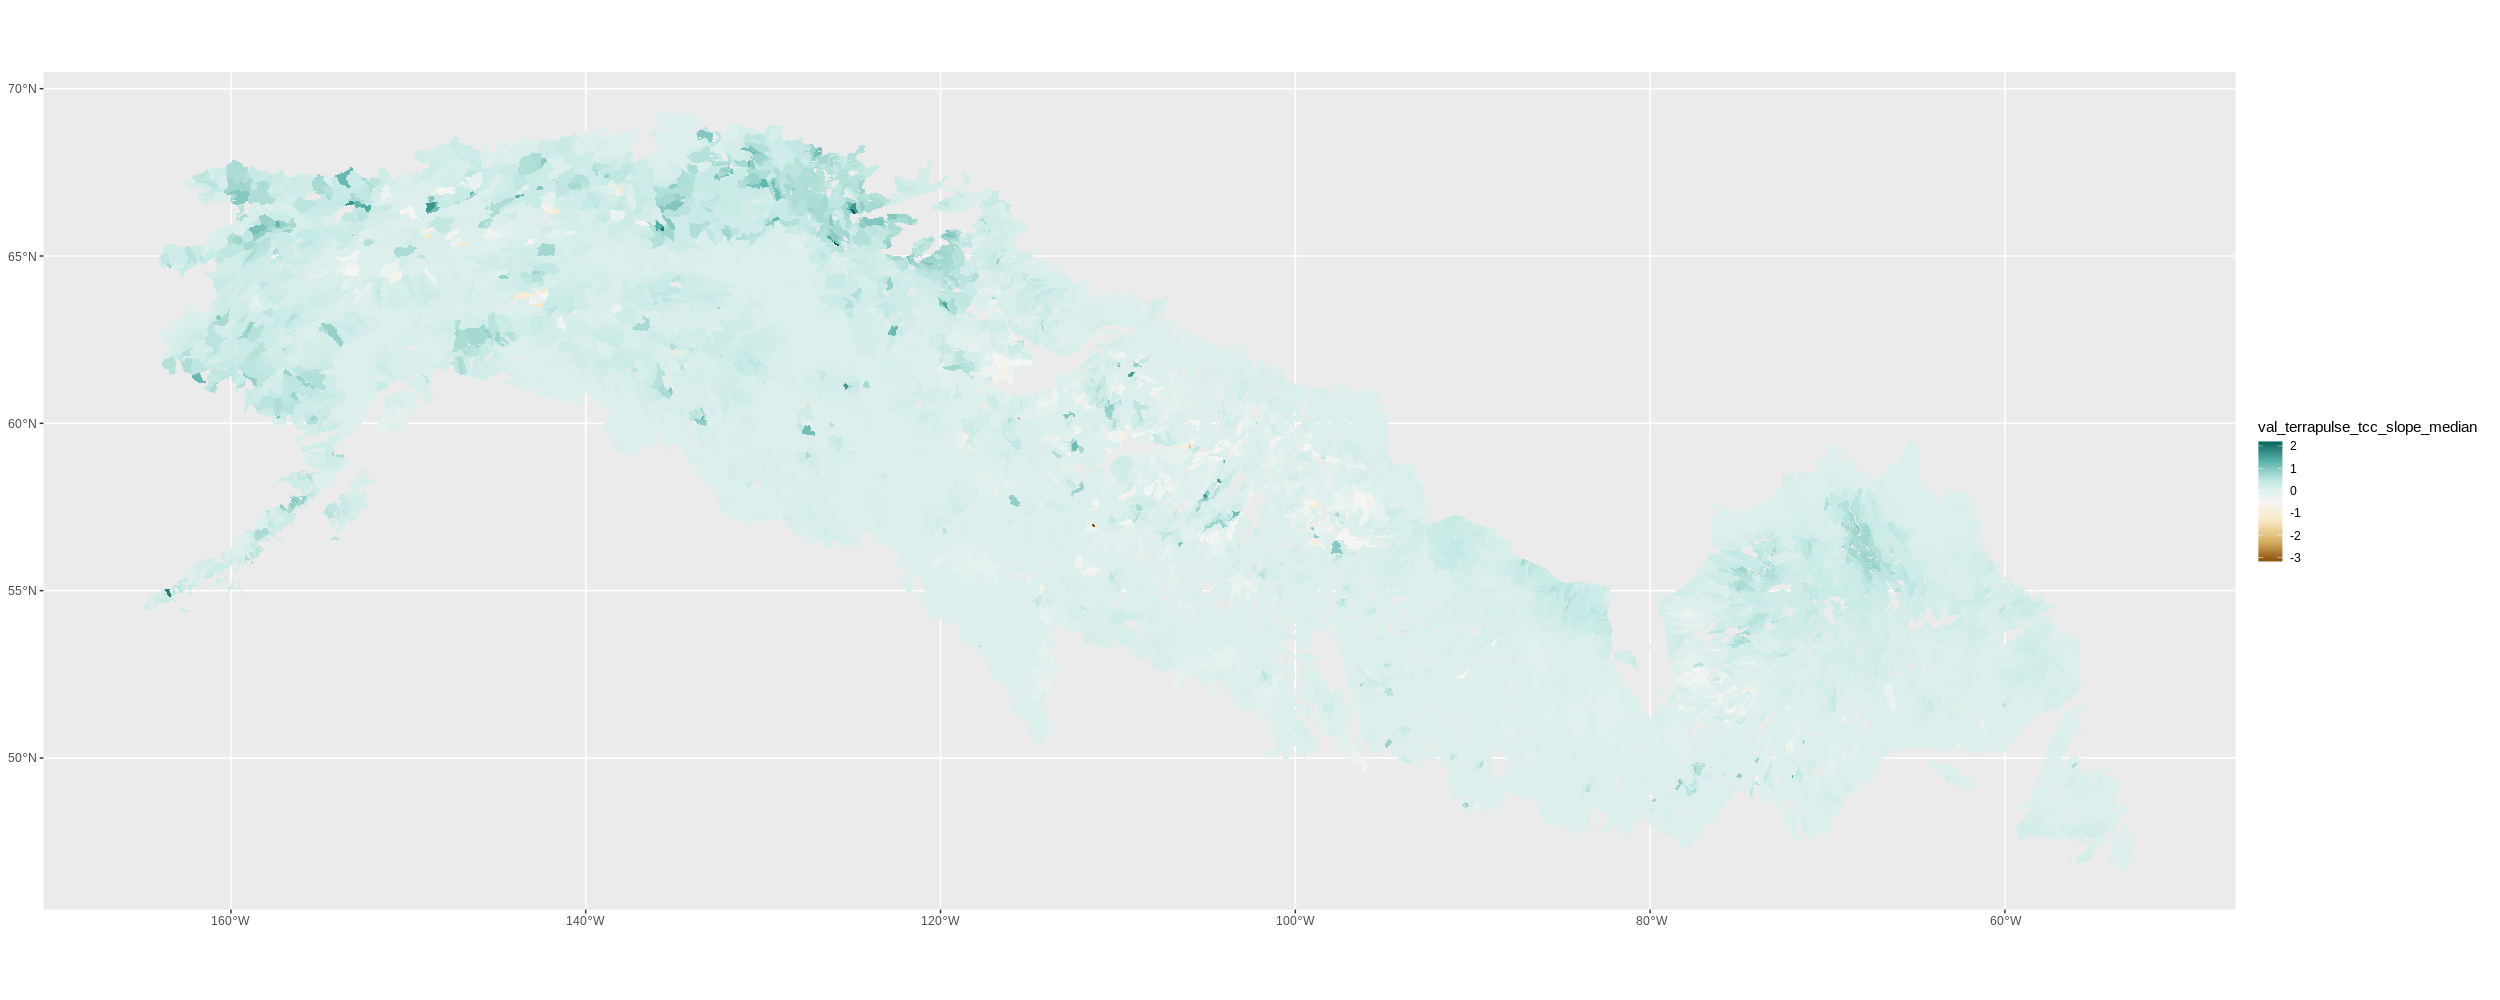

In [139]:
# ggplot(joined) + geom_histogram(aes(val_terrapulse_tcc_slope_median), binwidth=0.1) + facet_wrap(~pattern_class)
ggplot(joined) + 
    geom_sf(aes(fill=val_terrapulse_tcc_slope_median), color=NA) + 
    scale_fill_distiller(type="div", direction=1) #+ facet_wrap(~pattern_class)

In [24]:
st_write(joined, '/home/pmontesa/mfrost2/projects/boreal_hcan/data/hydrobasins_L08_patterns_tte_boreal_tundra_joined_future_recent.gpkg')

Writing layer `hydrobasins_L08_patterns_tte_boreal_tundra_joined_future_recent' to data source `/home/pmontesa/mfrost2/projects/boreal_hcan/data/hydrobasins_L08_patterns_tte_boreal_tundra_joined_future_recent.gpkg' using driver `GPKG'
Writing 12422 features with 20 fields and geometry type Multi Polygon.


In [31]:
joined = st_read('/home/pmontesa/mfrost2/projects/boreal_hcan/data/hydrobasins_L08_patterns_tte_boreal_tundra_joined_future_recent.gpkg')

Reading layer `hydrobasins_L08_patterns_tte_boreal_tundra_joined_future_recent' from data source `/panfs/ccds02/nobackup/people/mfrost2/projects/boreal_hcan/data/hydrobasins_L08_patterns_tte_boreal_tundra_joined_future_recent.gpkg' using driver `GPKG'
Simple feature collection with 12422 features and 20 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -164.9506 ymin: 46.60772 xmax: -52.61605 ymax: 69.36725
Geodetic CRS:  WGS 84


In [35]:
sprintf("%s landscapes with recent and future change", dim(joined)[1])

[1] "12422 landscapes with recent and future change"

In [36]:
head(joined)

Registered S3 method overwritten by 'geojsonsf':
  method        from   
  print.geojson geojson


HYBAS_ID   val_terrapulse_tcc_slope_median area_sqkm pattern_class    
1 7080020432 0.00000000                      1870.0770 TTE (abrupt)     
2 7080020501 0.02137841                      1009.1296 TTE (diffuse)    
3 7080021130 0.00000000                       681.1919 TTE (abrupt edge)
4 7080021430 0.00000000                      2951.3035 TTE (abrupt)     
5 7080021551 0.00000000                       471.5030 TTE (abrupt)     
6 7080021552 0.00284495                       478.4794 TTE (abrupt)     
  Med_diff_ssp245_2061.2080 Med_diff_ssp585_2041.2060 Med_diff_ssp585_2061.2080
1  0.9112656                 0.4803784                1.108387                 
2  1.4269199                 1.4269199                1.652592                 
3 14.0833492                16.0327415                8.755383                 
4 -0.2714396                 0.0504899                1.164692                 
5  0.5646479                 1.2031863                1.353511                 
6  0.5646479                 0.5646479                1.481303                 
  Med_diff_ssp126_2061.2080 Med_diff_ssp245_2041.2060 Med_diff_ssp370_2041.2060
1  0.4803784                0.4803784                 0.4803784                
2  0.9191968                0.8898575                 0.8387473                
3 11.0240841                8.2547436                 6.8916111                
4  0.3926969                0.2386208                 0.1367254                
5  0.9728129                0.9728129                 0.7771015                
6  0.9728129                0.9728129                 0.5646479                
  geom                           ... Med_diff_ssp370_2021.2040
1 MULTIPOLYGON (((-133.4458 5... ... 0.4488239                
2 MULTIPOLYGON (((-133.6708 5... ... 0.4803784                
3 MULTIPOLYGON (((-137.3917 5... ... 2.2554193                
4 MULTIPOLYGON (((-94.8125 59... ... 0.3373635                
5 MULTIPOLYGON (((-94.85676 5... ... 0.9728129                
6 MULTIPOLYGON (((-94.88519 5... ... 0.9728129                
  Med_diff_ssp585_2021.2040 Med_diff_ssp370_2061.2080 Med_diff_ssp585_2081.2100
1 0.4803784                  0.9292023                 1.1523337               
2 0.4803784                  1.7253757                 1.6525924               
3 7.3175554                 14.2424965                 7.7124672               
4 0.3373635                  0.7012248                -0.2721181               
5 0.9728129                  1.9212520                 0.4223357               
6 0.9728129                  2.9482877                -0.3548658               
  Med_diff_ssp126_2021.2040 Med_diff_ssp245_2021.2040 Med_diff_ssp245_2081.2100
1 0.4624417                 0.4803784                  1.1699824               
2 0.8387473                 0.4803784                  1.6707883               
3 0.4519292                 0.4519292                 11.7513275               
4 0.4150665                 0.2545724                  0.2545724               
5 0.9728129                 0.9728129                  1.4867961               
6 0.9728129                 0.9728129                  1.9605505               
  Med_diff_ssp126_2081.2100 Med_diff_ssp126_2041.2060
1 0.6361134                 0.4803784                
2 0.8518863                 0.6595628                
3 8.8837223                 7.2125525                
4 0.1367254                 0.4586549                
5 0.7687304                 0.9728129                
6 0.7687304                 0.9728129                
  geom                          
1 MULTIPOLYGON (((-133.4458 5...
2 MULTIPOLYGON (((-133.6708 5...
3 MULTIPOLYGON (((-137.3917 5...
4 MULTIPOLYGON (((-94.8125 59...
5 MULTIPOLYGON (((-94.85676 5...
6 MULTIPOLYGON (((-94.88519 5...

# Classify landscapes according to +,0,- change , for both recent and future.
1. \+ recent , + future
2. \+ recent , 0 future
3. \+ recent , - future
4. 0 recent , + future
5. 0 recent , 0 future
6. 0 recent , - future
7. \- recent , + future
8. \- recent , 0 future
9. \- recent , - future

In [38]:
str(joined)

Classes ‘sf’ and 'data.frame':	12422 obs. of  21 variables:
 $ HYBAS_ID                       : num  7.08e+09 7.08e+09 7.08e+09 7.08e+09 7.08e+09 ...
 $ val_terrapulse_tcc_slope_median: num  0 0.0214 0 0 0 ...
 $ area_sqkm                      : num  1870 1009 681 2951 472 ...
 $ pattern_class                  : Factor w/ 6 levels "Non-forest (tundra)",..: 3 4 2 3 3 3 3 4 4 4 ...
 $ Med_diff_ssp245_2061.2080      : num  0.911 1.427 14.083 -0.271 0.565 ...
 $ Med_diff_ssp585_2041.2060      : num  0.4804 1.4269 16.0327 0.0505 1.2032 ...
 $ Med_diff_ssp585_2061.2080      : num  1.11 1.65 8.76 1.16 1.35 ...
 $ Med_diff_ssp126_2061.2080      : num  0.48 0.919 11.024 0.393 0.973 ...
 $ Med_diff_ssp245_2041.2060      : num  0.48 0.89 8.255 0.239 0.973 ...
 $ Med_diff_ssp370_2041.2060      : num  0.48 0.839 6.892 0.137 0.777 ...
 $ Med_diff_ssp370_2081.2100      : num  0.949 0.714 14.242 0.619 1.851 ...
 $ Med_diff_ssp370_2021.2040      : num  0.449 0.48 2.255 0.337 0.973 ...
 $ Med_diff_ssp58

In [43]:
MEDIAN_DIFF_COLS = names(joined)[grepl( "Med_diff" , names( joined ) )]
joined.m = melt(joined, id.vars = c('HYBAS_ID','pattern_class','val_terrapulse_tcc_slope_median'
                                   ,'area_sqkm'), measure.vars = MEDIAN_DIFF_COLS) %>% 
            separate(variable,  into=c('stat', 'type', 'ssp', 'time_period'), sep='_')

joined.m[which((joined.m$val_terrapulse_tcc_slope_median  > 0) & (joined.m$value > 0)), "change_class_combined"] <- "+, +"
joined.m[which((joined.m$val_terrapulse_tcc_slope_median > 0) & (joined.m$value == 0)),   "change_class_combined"] <- "+, 0" 
joined.m[which((joined.m$val_terrapulse_tcc_slope_median > 0) & (joined.m$value < 0)),    "change_class_combined"] <- "+, -"
joined.m[which((joined.m$val_terrapulse_tcc_slope_median == 0) & (joined.m$value > 0)),   "change_class_combined"] <- "0, +"
joined.m[which((joined.m$val_terrapulse_tcc_slope_median == 0) & (joined.m$value == 0)), "change_class_combined"] <- "0, 0" 
joined.m[which((joined.m$val_terrapulse_tcc_slope_median == 0) & (joined.m$value < 0)),   "change_class_combined"] <- "0, -"
joined.m[which((joined.m$val_terrapulse_tcc_slope_median < 0) & (joined.m$value > 0)),    "change_class_combined"] <-  "-, +"
joined.m[which((joined.m$val_terrapulse_tcc_slope_median < 0) & (joined.m$value == 0)),   "change_class_combined"] <- "-, 0" 
joined.m[which((joined.m$val_terrapulse_tcc_slope_median < 0) & (joined.m$value < 0)),    "change_class_combined"] <- "-, -"

joined.m[which(joined.m$val_terrapulse_tcc_slope_median  > 0), "change_class_tcc"] <- "+"
joined.m[which(joined.m$val_terrapulse_tcc_slope_median == 0), "change_class_tcc"] <- "0" 
joined.m[which(joined.m$val_terrapulse_tcc_slope_median < 0),  "change_class_tcc"] <- "-"

joined.m[which(joined.m$value > 0), "change_class_height"] <- "+"
joined.m[which(joined.m$value == 0),"change_class_height"] <- "0" 
joined.m[which(joined.m$value < 0), "change_class_height"] <- "-"

head(joined.m)

HYBAS_ID   pattern_class     val_terrapulse_tcc_slope_median area_sqkm stat
1 7080020432 TTE (abrupt)      0.00000000                      1870.0770 Med 
2 7080020501 TTE (diffuse)     0.02137841                      1009.1296 Med 
3 7080021130 TTE (abrupt edge) 0.00000000                       681.1919 Med 
4 7080021430 TTE (abrupt)      0.00000000                      2951.3035 Med 
5 7080021551 TTE (abrupt)      0.00000000                       471.5030 Med 
6 7080021552 TTE (abrupt)      0.00284495                       478.4794 Med 
  type ssp    time_period value      change_class_combined change_class_tcc
1 diff ssp245 2061.2080    0.9112656 0, +                  0               
2 diff ssp245 2061.2080    1.4269199 +, +                  +               
3 diff ssp245 2061.2080   14.0833492 0, +                  0               
4 diff ssp245 2061.2080   -0.2714396 0, -                  0               
5 diff ssp245 2061.2080    0.5646479 0, +                  0               
6 diff ssp245 2061.2080    0.5646479 +, +                  +               
  change_class_height
1 +                  
2 +                  
3 +                  
4 -                  
5 +                  
6 +

In [44]:
levels(factor(joined.m$change_class))

character(0)

In [70]:
install.packages('ggnewscale')

In [71]:
library(ggnewscale)

In [61]:
joined.m$change_class_combined = factor(joined.m$change_class_combined, levels = c("-, -", "-, 0", "-, +", "0, -", "0, 0", "0, +", "+, -", "+, 0",  "+, +"))
#colors_change_class_combined = c()
joined.m$change_class_tcc = factor(joined.m$change_class_tcc, levels = c("-", "0", "+"))
joined.m$change_class_height = factor(joined.m$change_class_height, levels = c("-", "0", "+"))

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


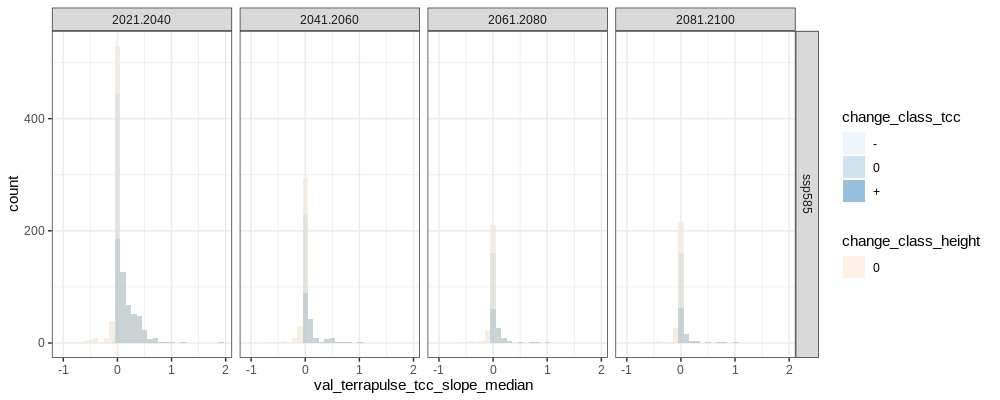

In [83]:
options(repr.plot.width = 10, repr.plot.height = 4, repr.plot.res = 100)
# Check the 0's
ggplot(joined.m %>% filter(ssp == 'ssp585', value == 0)) +
    geom_histogram(aes(x=val_terrapulse_tcc_slope_median, fill=change_class_tcc), alpha=0.5) + scale_fill_brewer(palette='Blues') + 
  # geoms below will use another color scale
  new_scale_fill() +
    geom_histogram(aes(x=val_terrapulse_tcc_slope_median, fill=change_class_height), alpha=0.5) + scale_fill_brewer(palette='Oranges') +
facet_grid(ssp~time_period) + theme_bw()

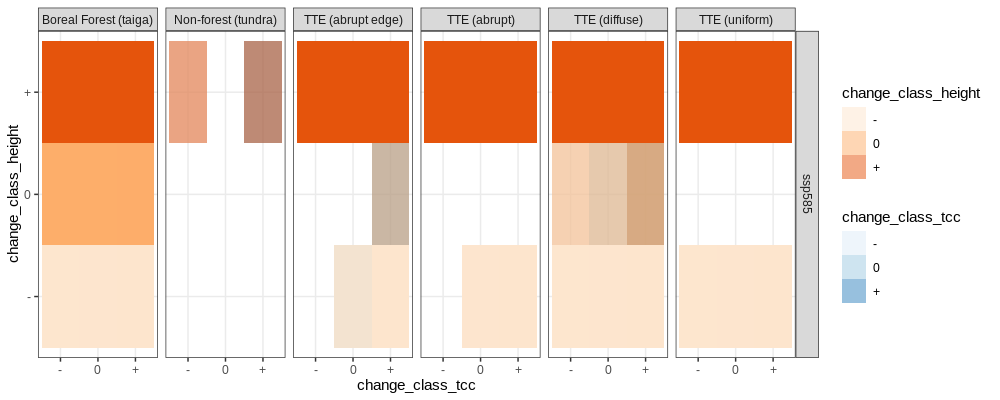

In [82]:
options(repr.plot.width = 10, repr.plot.height = 4, repr.plot.res = 100)
# PLay around...
ggplot(joined.m %>% filter(ssp == 'ssp585', time_period == '2081.2100')) +
    geom_tile(aes(x=change_class_tcc, y=change_class_height, fill=change_class_tcc), alpha=0.5) + scale_fill_brewer(palette='Blues') + 
  # geoms below will use another color scale
  new_scale_fill() +
    geom_tile(aes(x=change_class_tcc, y=change_class_height, fill=change_class_height), alpha=0.5) + scale_fill_brewer(palette='Oranges') +
facet_grid(ssp~pattern_class) + theme_bw()

In [118]:
options(repr.plot.width =25, repr.plot.height =10, repr.plot.res = 100)

ggplot(joined.m %>% filter(pattern_class != 'Non-forest (tundra)')) +
    geom_hline(yintercept=0, color='red', linetype='dashed', lwd=0.75) +
    geom_vline(xintercept=0, color='red', linetype='dashed', lwd=0.75) +
    geom_bin2d(aes(x=val_terrapulse_tcc_slope_median, y=value), alpha=0.75) +
    facet_grid(time_period~ssp+pattern_class) +
    scale_fill_viridis() +
    theme_bw() +
    coord_cartesian(xlim=c(-1.5,1.5)) +
    labs(x=TCC_TREND_TITLE, y='Difference in vegetation height [m]\n(median, future - current)')

ERROR: Error in filter(., pattern_class != "Non-forest (tundra)"): object 'joined.m' not found


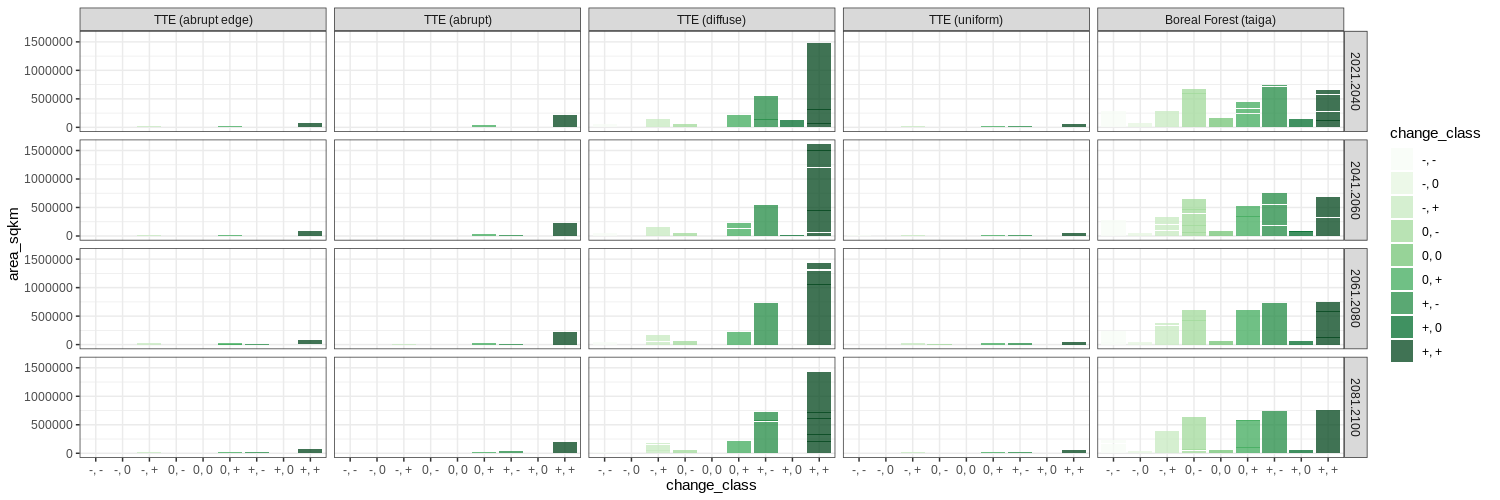

In [42]:
options(repr.plot.width =15, repr.plot.height =5, repr.plot.res = 100)

ggplot(joined.m %>% filter(pattern_class != 'Non-forest (tundra)' & ssp == 'ssp585')) +

    geom_histogram(aes(x=change_class, y=area_sqkm, fill=change_class), alpha=0.75, stat='identity') +
    facet_grid(time_period~pattern_class) +
    scale_fill_brewer(palette='viridis') +
    theme_bw() #+
    #labs(x=TCC_TREND_TITLE, y='Difference in vegetation height [m]\n(median, future - current)')

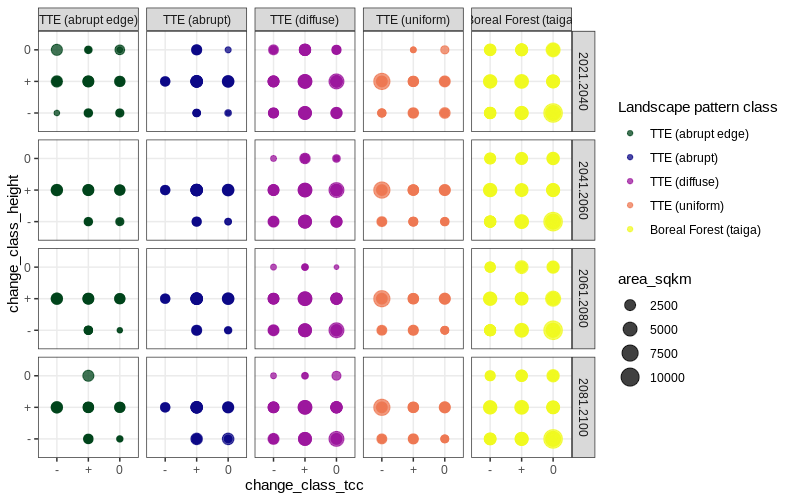

In [56]:
options(repr.plot.width =8, repr.plot.height =5, repr.plot.res = 100)

ggplot(joined.m %>% filter(pattern_class != 'Non-forest (tundra)' & ssp == 'ssp585')) +

    geom_point(aes(x=change_class_tcc, y=change_class_height, color=pattern_class, size=area_sqkm), alpha=0.75, stat='identity') +
    facet_grid(time_period~pattern_class) +
    #scale_fill_brewer(palette='viridis') +
    scale_color_landscape_pattern_class +
    theme_bw() #+
    #labs(x=TCC_TREND_TITLE, y='Difference in vegetation height [m]\n(median, future - current)')

In [16]:
BOREAL_SHP_FN = 'na'
if( (is.na(BOREAL_SHP_FN)) | (BOREAL_SHP_FN == '') ){print('no')}

In [11]:
DO_MAP_BOREAL_SP <- function( MAP_EXTENT = extent(-180,180,45,90), xlim=NULL, ylim=NULL, rotate_map=0, proj_name = 'azequalarea', LAYER_LIST=NULL, 
                             BOREAL_SHP_FN = NA, DO_COORD_MAP=TRUE){
  #
  # Map with a polar projection
  #
  
  # Color scale help
  #https://biostats.w.uib.no/color-scale-for-continuous-variables/
  
  #source(path("C:\\Users\\pmontesa\\Google Drive\\Work\\R","plot_functions.R"))
  # Shapefiles
  
  world <- crop(ne_countries(scale = "medium", returnclass = "sp"), MAP_EXTENT)
  map_list_base = list(
    geom_polygon(data = fortify(world), aes(x = long, y = lat, group = group), fill="grey90", color=NA)
  )
  # WWF
  #boreal <- shp_fort_join("D:\\databank\\wwf\\arc\\wwf_circumboreal_Dissolve.shp", MAP_EXTENT, REPROJECT = TRUE)
  # TerraPulse
  if( (is.na(BOREAL_SHP_FN)) | (BOREAL_SHP_FN == '') ){
      print('Not adding boreal layer to map...')
  }else{ 
      boreal <- shp_fort_join(BOREAL_SHP_FN, MAP_EXTENT, REPROJECT = TRUE)
      map_list_base = list(map_list_base, 
                           geom_polygon(data = boreal, aes(x = long, y = lat, group = group), color=NA, fill="grey70")
                          )
  }
    
  map_list_top = list(
    
    geom_polygon(data = fortify(world), aes(x = long, y = lat, group = group), fill=NA, color="black", size=0.1 ),
    
    theme_minimal() , 
    theme(axis.text = element_blank(), axis.title = element_blank() ) ,
    
    #geom_polygon(data = fortify(continents.df_stereo), aes(x = long, y = lat, group = group), fill = NULL, colour = "black", size=0.25) +
    #scale_color_distiller(palette = "Greens", direction = 1, name = "%"),
    #scale_color_manual(values = COLOR_PAL, name = map_str) ,
    guides(guide = guide_legend(direction = "horizontal", nrow=1, label.position = "bottom", title.position = "bottom") ) ,
    theme(legend.position="top",
          legend.title = element_text(size=9),
          #       legend.direction  = 'vertical',
          legend.key.width  = unit(1.0, "cm"),
          legend.key.height = unit(.25, "cm")  )
  )
  
  if(is.null(LAYER_LIST)){
    map_list = list(
      map_list_base,
      map_list_top
    )
  }else{
    map_list = list(
      map_list_base,
      LAYER_LIST,
      map_list_top
    )
  }
  
  p_map = ggplot() + map_list
  if(DO_COORD_MAP){
    # If you want to facet plot, set DO_COORD_MAP=FALSE and run coord_map() and returned map like this eg:
    # out_p_map + coord_map("azequalarea", orientation = c(90, 0, 270), xlim=c(-170,-10), ylim=c(ext[3]-1, 90))
    p_map = p_map +  
    coord_map_stereo_list(proj_name = proj_name, min_lat = MAP_EXTENT[3], rotation=rotate_map, xlim = xlim, ylim = ylim)
    }
    #coord_map_stereo_list(proj_name = proj_name, min_lat = MAP_EXTENT[3], rotation=rotate_map)
    
  
  if(FALSE){
    out_plot_fn = paste0("D:/projects/3dsi/plots/map_boreal_",proj_name,"_", format(Sys.time(), "_%Y%m%d"),'.png')
    print(out_plot_fn)
    ggsave(plot = p_map ,
           file = out_plot_fn,
           device = 'png', dpi = 300, width = 5, height = 5)
  }
  #print(p_map)
  return(p_map)
  
}

coord_map_stereo_list <- function(proj_name = "stereo", rotation = 0, min_lat = 50, xlim=NULL, ylim=NULL, add_axis_labs=TRUE){ 
  
  # Defines the x axes required
  lat_lines = seq(min_lat+10, 80, by = 10)
  lat_labs = paste0(seq(min_lat+10, 80, by = 10), "\u00B0N")
  
  lon_lines = seq(0, 330, by = 30)
  lon_labs = c("0", paste0(seq(30, 150, by = 30), "°E"), "180", rev(paste0(seq(30, 150, by = 30), "°W")))
  
  
  return(list(
    # Convert to polar coordinates
    coord_map(proj_name, orientation = c(90, 0, rotation), xlim=xlim, ylim=ylim), #"ortho""
    #scale_y_continuous(breaks = seq(55, 90, by = 5), labels = NULL),
    
    # Removes Axes and labels
    scale_x_continuous(breaks = NULL),
    xlab(""),
    ylab(""),
    
    # Adds axes
    # Latitude
    geom_hline(aes(yintercept = lat_lines), size = 0.25, color = "grey80", linetype = "solid"),
    # Outer circular border
    geom_hline(aes(yintercept = min_lat), size = 0.25), #1
    # Longitude
    geom_vline(aes(xintercept = lon_lines), size = 0.25, color = "grey80", linetype = "dotted"),
    #geom_segment(aes(y = 45, yend = 85, x = x_lines, xend = x_lines), linetype = "dotted") +
    
    # Adds labels

    geom_label(aes(x = -10, y = lat_lines, label = lat_labs), label.size = NA, size=3.5, color = "black", fill="white", label.padding=unit(0.1,"lines")),

    # min-3 so lon labels are centered over outer line
    geom_label(aes(x = lon_lines, y = min_lat-3, label = lon_labs), label.size = NA,  hjust='inward', vjust='inward', size = 3.5, color = "black", fill="white", label.padding=unit(0.1,"lines")),  #y = min_lat-3 why used to be this?
    
    ##guides(fill=FALSE)+
    
    # Change theme to remove axes and ticks
    theme(panel.background = element_blank(),
          #panel.grid = element_line(size = 0.25, linetype = 'dotted', colour = "grey50"),
          axis.ticks=element_blank())
    #,
    #labs(caption = "Source: circ_tte_map.Rmd")
  ))
}  